In [2]:
#importing packages for data analysis
import pandas as pd
import numpy as np

#importing packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
from ydata_profiling import ProfileReport

#allows charts to appear in the notebook
%matplotlib inline

#setting plot stuyle
plt.style.use('ggplot')

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#setting column display
pd.options.display.max_columns = None

In [3]:
tesla = pd.read_csv("Tesla - Deaths.csv")
tesla.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [4]:
tesla.shape

(307, 24)

In [5]:
tesla_cols = [col.strip() for col in tesla.columns.tolist()]
tesla.columns = tesla_cols
tesla.columns

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')

In [6]:
# missing value check
round(tesla.isna().sum()/len(tesla)*100,2)

Case #                                                                  4.23
Year                                                                    4.23
Date                                                                    4.23
Country                                                                 4.23
State                                                                   4.23
Description                                                             3.91
Deaths                                                                  2.61
Tesla driver                                                            4.23
Tesla occupant                                                          5.54
Other vehicle                                                           3.91
Cyclists/ Peds                                                          3.58
TSLA+cycl / peds                                                        3.26
Model                                                                   3.58

In [7]:
# tesla_profile =  ProfileReport(tesla, title = "Tesla Data Profle Report")
# tesla_profile.to_notebook_iframe()

In [8]:
# Check for duplicate rows
duplicate_rows = tesla[tesla.duplicated()]
duplicate_rows

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tesla.drop_duplicates(inplace=True)

In [10]:
print(tesla.shape)

# dropping Unnamed16 and Unnamed17 columns as there is no information present for these columns in data description

cols_to_drop =  ['Source', 'Unnamed: 16', 'Unnamed: 17', "Note", 'Deceased 1', 'Deceased 2', 'Deceased 3','Deceased 4']
tesla.drop(columns= cols_to_drop,  inplace = True)

print(tesla.shape)

(303, 24)
(303, 16)


In [11]:
#checking row-wise null

set(tesla.isnull().sum(axis = 1).tolist())

{0, 1, 2, 3, 4, 5, 7, 15, 16}

In [12]:
# % of rows with more than 1 null values

round((tesla[tesla.isnull().sum(axis = 1) > 1].shape[0]/len(tesla)*100),2)

5.61

In [13]:
tesla[tesla.isnull().sum(axis = 1) == 1].shape

(20, 16)

In [14]:
# dropping rows with more than or equal to 2 null values in one row
print(tesla.shape)
tesla.dropna(thresh = 15, inplace = True)
print(tesla.shape)

(303, 16)
(286, 16)


In [15]:
tesla.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-


In [16]:
round((tesla.nunique()/len(tesla)*100),2)

Case #                                                                100.00
Year                                                                    3.50
Date                                                                   89.86
Country                                                                 8.04
State                                                                  14.69
Description                                                            83.92
Deaths                                                                  1.40
Tesla driver                                                            0.70
Tesla occupant                                                          1.40
Other vehicle                                                           1.75
Cyclists/ Peds                                                          1.05
TSLA+cycl / peds                                                        1.75
Model                                                                   2.45

In [17]:
tesla['Tesla driver'].unique()

array(['  1 ', ' - '], dtype=object)

In [18]:
tesla['Tesla driver'] = tesla['Tesla driver'].replace(' - ', '0')
tesla['Tesla driver'] = tesla['Tesla driver'].replace('  1 ', '1')
tesla['State'] = tesla['State'].replace('-', 'Unknown')
tesla['Model'] = tesla['Model'].replace(' - ', 'Unknown')
tesla['Model'].value_counts()

Model
Unknown    177
 S          44
  3         37
 X          17
 Y           9
  1          1
  2          1
Name: count, dtype: int64

In [19]:
tesla['Other vehicle'] = tesla['Other vehicle'].replace(' - ', pd.NA).fillna(0)
tesla['Cyclists/ Peds'] = tesla['Cyclists/ Peds'].replace(' - ', pd.NA).fillna(0)
tesla['TSLA+cycl / peds'] = tesla['TSLA+cycl / peds'].replace(' - ', pd.NA).fillna(0)
tesla['Verified Tesla Autopilot Deaths'] = tesla['Verified Tesla Autopilot Deaths'].replace(' - ', pd.NA).replace("-", pd.NA).fillna(0)
tesla['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] = tesla['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].replace(' - ', pd.NA).fillna(0)
tesla['Tesla occupant'] = tesla['Tesla occupant'].replace(' - ', pd.NA).fillna(0)
tesla['Autopilot claimed'] = tesla['Autopilot claimed'].replace(' - ', pd.NA).fillna(0)

In [20]:
tesla.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,Unknown,0,0,0
1,293.0,2022.0,1/7/2023,Canada,Unknown,Tesla crashes,1.0,1,0,0,0,1,Unknown,0,0,0
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,Unknown,0,0,0
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,Unknown,0,0,0
4,290.0,2022.0,12/19/2022,Canada,Unknown,Tesla crashes into storefront,1.0,0,0,0,1,1,Unknown,0,0,0


In [21]:
# Check if 'date' is in datetime format and convert if necessary
tesla['Date'] = pd.to_datetime(tesla['Date'], errors='coerce')

# Create 'year' and 'month' columns
tesla['Year'] = tesla['Date'].dt.year
tesla['Month'] = tesla['Date'].dt.month
tesla['Day'] = tesla['Date'].dt.day
# tesla.drop('Year', axis=1, inplace =True)
# tesla.drop('Date', axis=1, inplace =True)


In [22]:
cols_to_int = ['Other vehicle', 'Tesla driver', 'Other vehicle', 'TSLA+cycl / peds', 'Verified Tesla Autopilot Deaths', 'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', 'Tesla occupant', 'Autopilot claimed', 'Case #', 'Deaths', 'Month', 'Day', "Cyclists/ Peds"]

for col in cols_to_int:
    tesla[col] = tesla[col].astype(int)

In [23]:
# tesla.drop('Date', axis=1, inplace =True)
tesla.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
0,294,2023,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,Unknown,0,0,0,1,17
1,293,2023,2023-01-07,Canada,Unknown,Tesla crashes,1,1,0,0,0,1,Unknown,0,0,0,1,7
2,292,2023,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,Unknown,0,0,0,1,7
3,291,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,Unknown,0,0,0,12,22
4,290,2022,2022-12-19,Canada,Unknown,Tesla crashes into storefront,1,0,0,0,1,1,Unknown,0,0,0,12,19


In [24]:
cols_to_strip = ["State", "Description", "Model", "Country"]

for col in cols_to_strip:
    tesla[col] = tesla[col].str.strip()

In [25]:
def draw_barplot(colname, dframe = tesla, thresh = None, sort_index = False, labelname = None):

    # Create a copy to avoid changing the original dataframe
    df = dframe.copy()
    counts = df[colname].value_counts()
    if thresh:
        others = counts[counts < thresh].index.tolist() # taking 10 as threshold
        df[colname] = df[colname].replace(others, f'Other_{len(others)}')

    # Calculate counts and percentages and plotting top 5
    counts = df[colname].value_counts()
    if sort_index:
        percentages = df[colname].value_counts(normalize=True).sort_index()*100
    else:
        percentages = df[colname].value_counts(normalize=True)*100

    # Create a bar plot using seaborn
    plt.figure(figsize=(18,5))
    ax = sns.barplot(x = counts.index, y = counts.values)

    # Add count labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    # Add percentage labels
    for p, percent in zip(ax.patches, percentages):
        ax.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() * 0.75), ha='center', va='top')
        
    plt.title(f"Bar Plot for {labelname}")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
tesla['State'].value_counts()

State
CA         91
Unknown    77
FL         31
GA          8
AZ          8
PA          7
OH          6
UT          5
NY          5
VA          4
NV          4
MO          4
WA          3
IL          3
NJ          3
HI          2
NH          2
MI          2
SC          2
OR          2
TX          2
IN          2
IA          2
TN          1
DE          1
CO          1
ME          1
ID          1
MA          1
AR          1
AL          1
HA          1
MD          1
NC          1
Name: count, dtype: int64

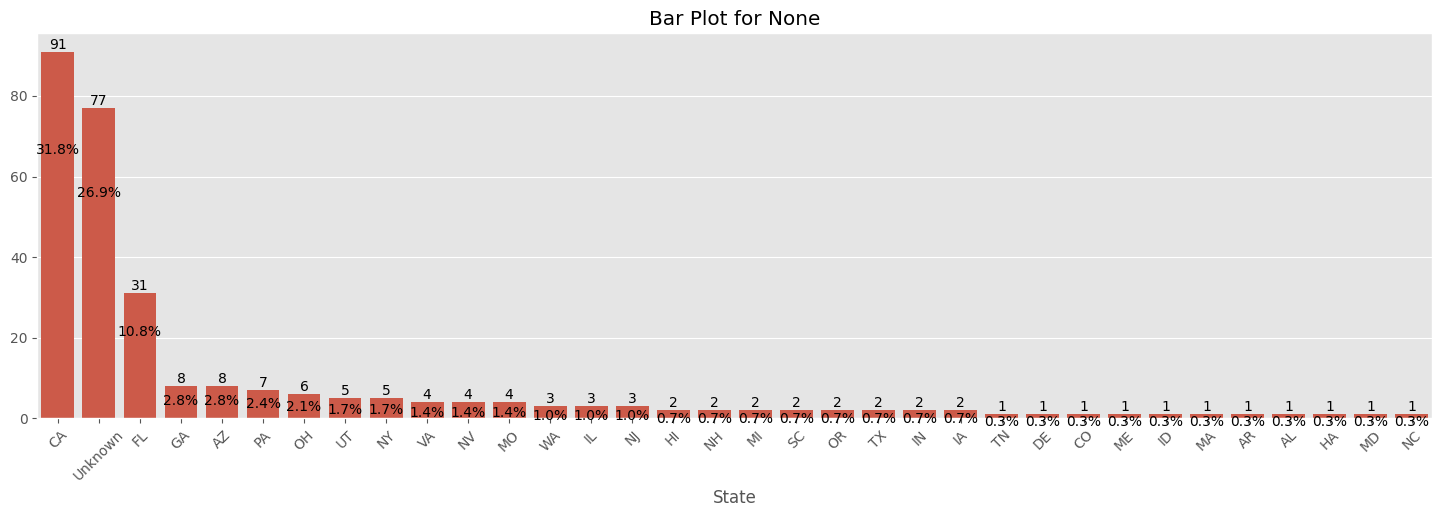

In [27]:
draw_barplot(colname = "State")

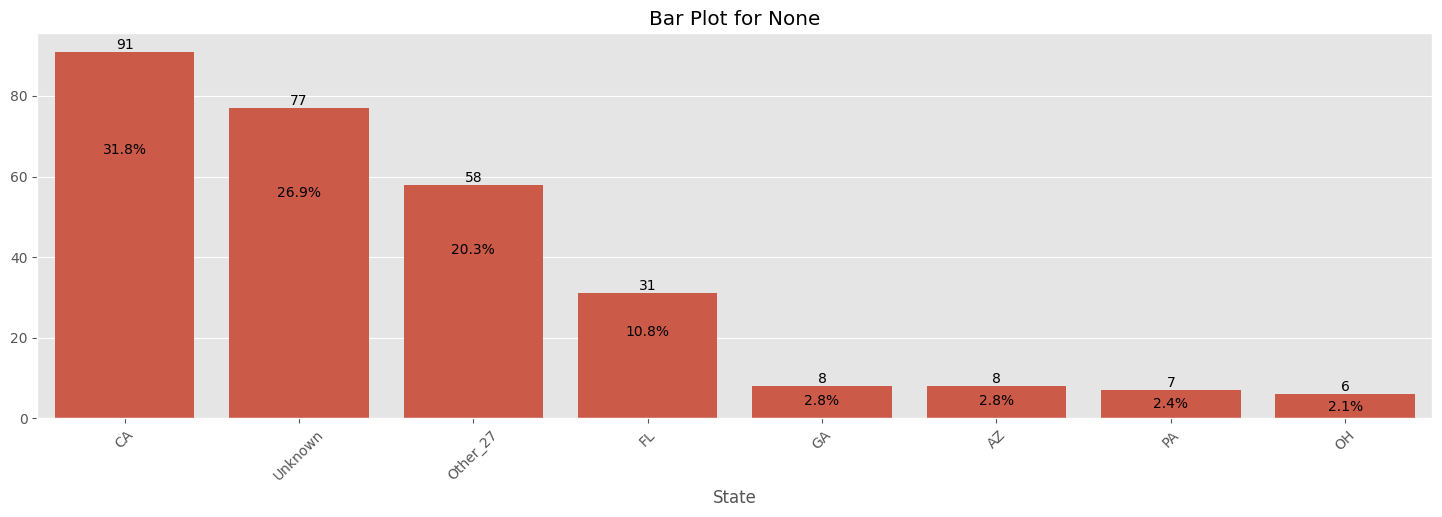

In [28]:
draw_barplot(colname = "State", thresh = 6)

In [29]:
tesla['Country'].value_counts()

Country
USA            209
China           16
Germany         11
Canada          10
UK               5
Netherlands      5
Norway           4
Holland          3
Taiwan           3
Switzerland      3
Belgium          2
Denmark          2
Australia        2
Japan            2
France           1
Portugal         1
South Korea      1
Finland          1
Slovenia         1
Austria          1
Ukraine          1
Spain            1
Mexico           1
Name: count, dtype: int64

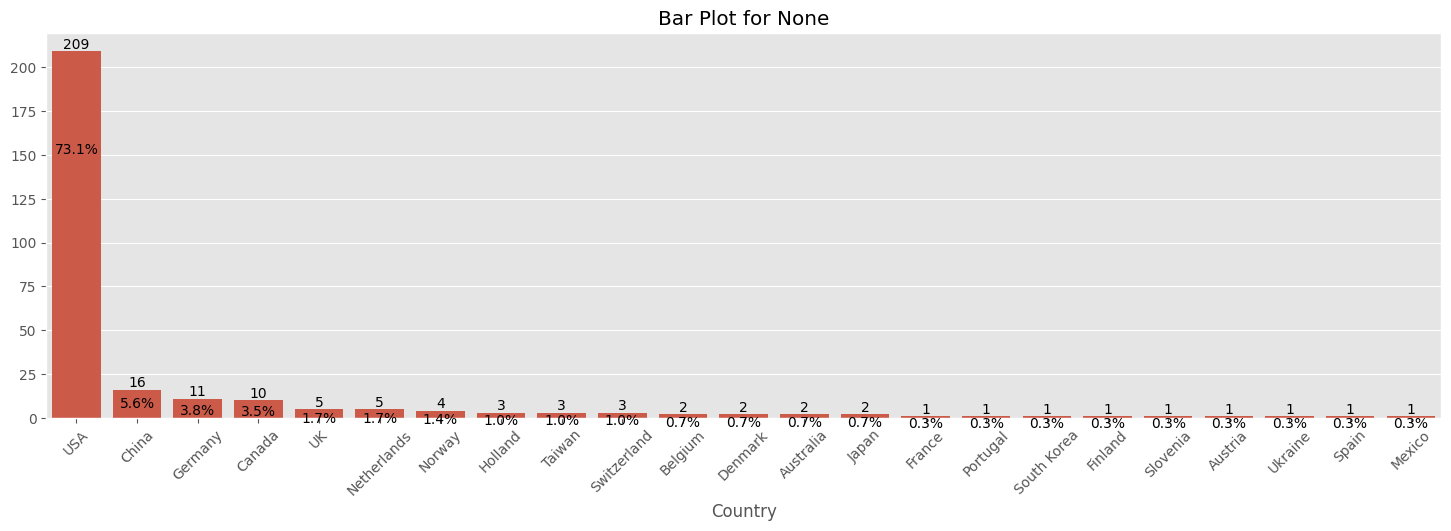

In [30]:
draw_barplot(colname = "Country")

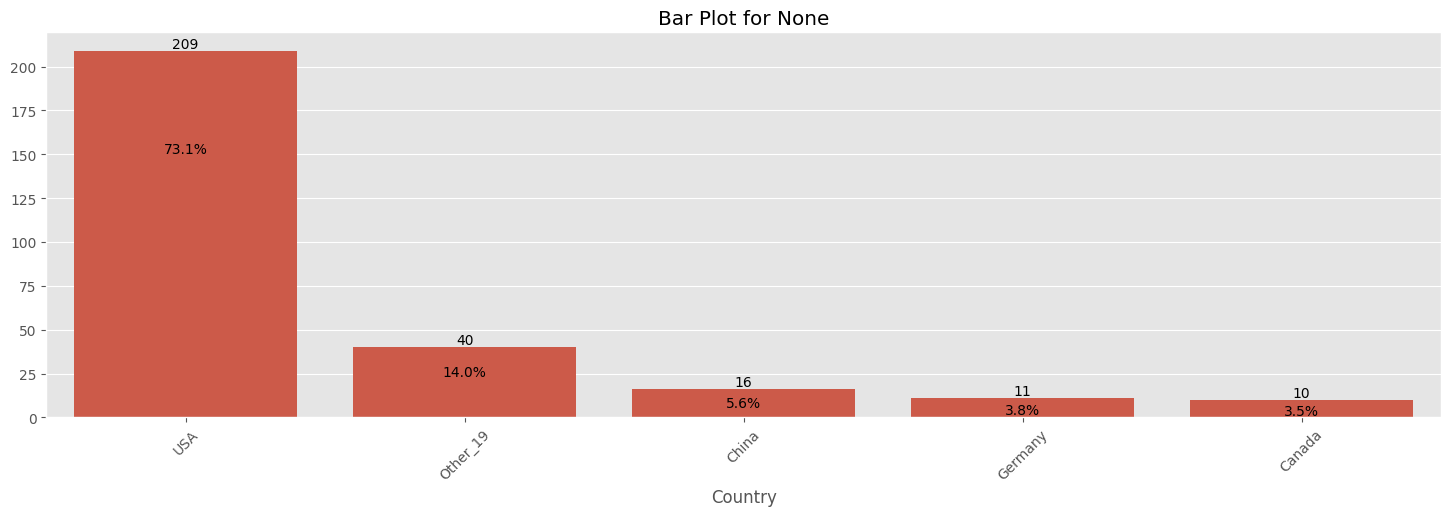

In [31]:
draw_barplot(colname = "Country", thresh = 10)

In [32]:
tesla["Year"].value_counts()

Year
2022    90
2021    54
2019    46
2020    38
2018    18
2016    15
2017    11
2015     5
2014     4
2023     3
2013     2
Name: count, dtype: int64

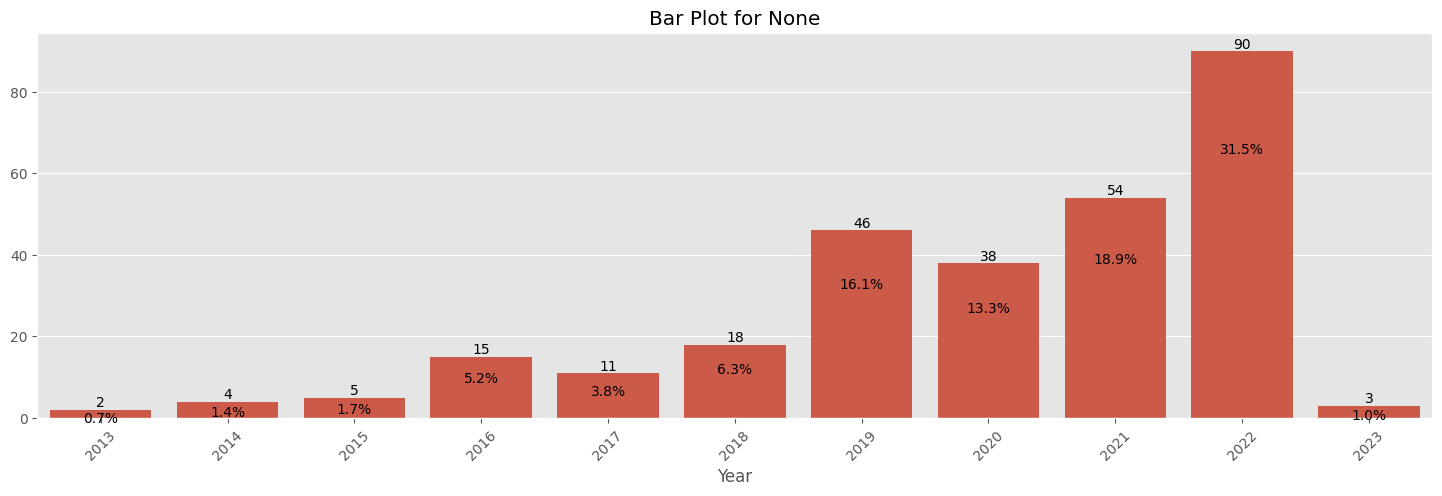

In [33]:
draw_barplot(colname = "Year", sort_index= True)

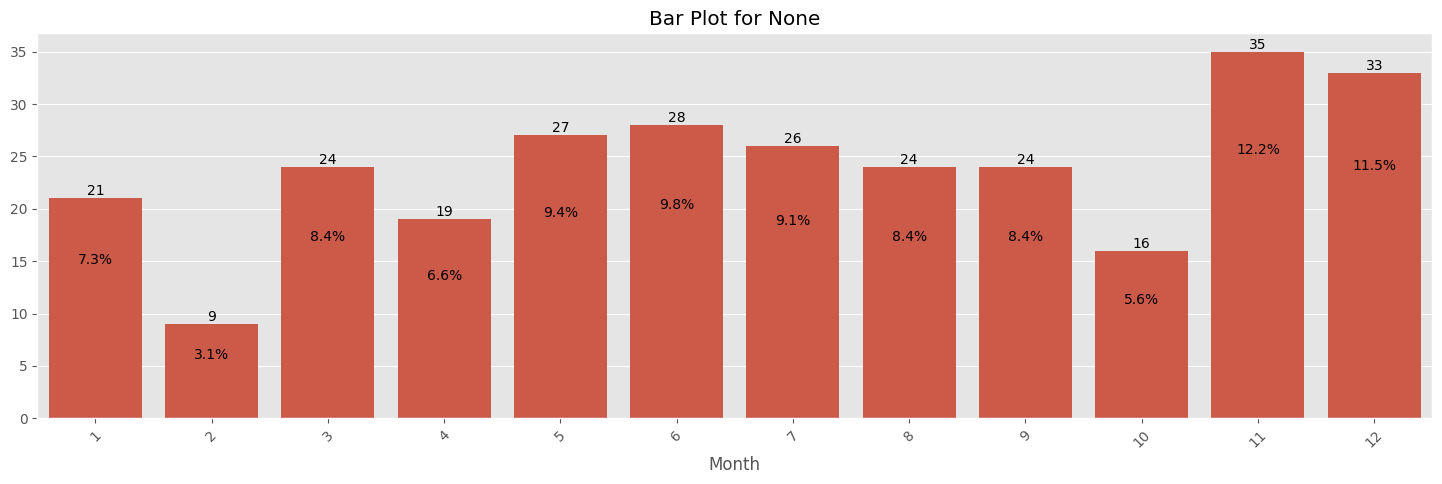

In [34]:
draw_barplot("Month", sort_index= True)

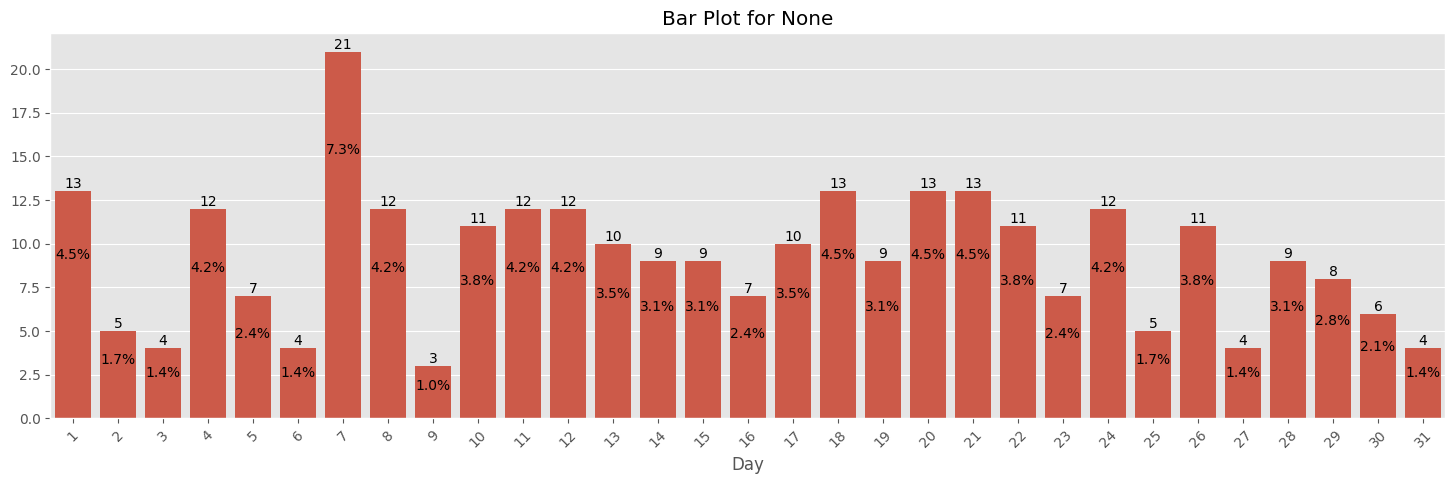

In [35]:
draw_barplot("Day", sort_index= True)

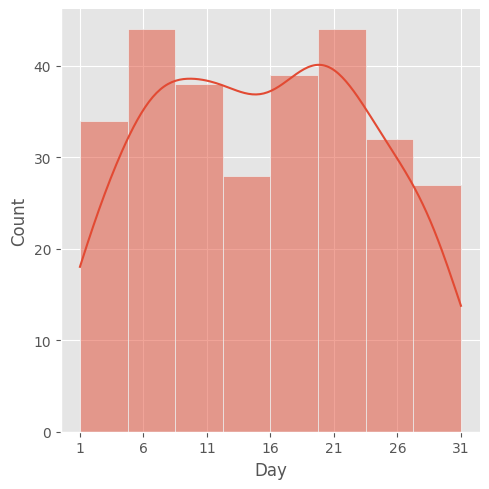

In [36]:
sns.displot(data=tesla, x="Day", kde = True, bins = 8)
plt.xticks(range(1,32,5));

In [37]:
tesla[tesla["Year"] == 2013]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
292,2,2013,2013-11-02,USA,CA,Tesla kills cyclist,1,0,0,0,1,1,Unknown,0,0,0,11,2
293,1,2013,2013-04-02,USA,CA,Tesla veers into opposite lane,2,0,0,2,0,0,S,0,0,0,4,2


In [38]:
tesla[tesla["Year"] == 2023]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
0,294,2023,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,Unknown,0,0,0,1,17
1,293,2023,2023-01-07,Canada,Unknown,Tesla crashes,1,1,0,0,0,1,Unknown,0,0,0,1,7
2,292,2023,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,Unknown,0,0,0,1,7


In [39]:
# checking days of cases in nov and dec

df_high = tesla[(tesla["Month"] == 11) | (tesla["Month"] == 12)] 
df_high.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
3,291,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,Unknown,0,0,0,12,22
4,290,2022,2022-12-19,Canada,Unknown,Tesla crashes into storefront,1,0,0,0,1,1,Unknown,0,0,0,12,19
5,289,2022,2022-12-18,USA,CA,Tesla hit two other cars,1,0,1,0,0,0,Unknown,0,0,0,12,18
6,288,2022,2022-12-17,USA,CA,Tesla hits pedestrian on highway,1,0,0,0,1,1,Unknown,0,0,0,12,17
7,287,2022,2022-12-11,USA,CA,Tesla crashes into wall,1,1,0,0,0,0,Unknown,0,0,0,12,11


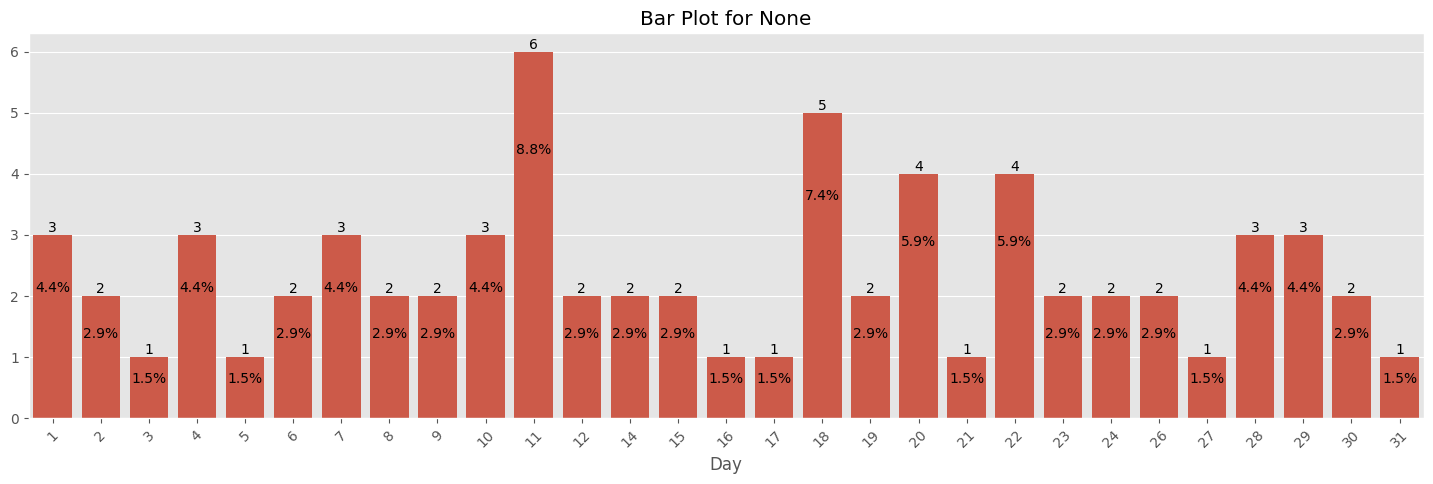

In [40]:
draw_barplot(colname = "Day", dframe = df_high, sort_index=True)

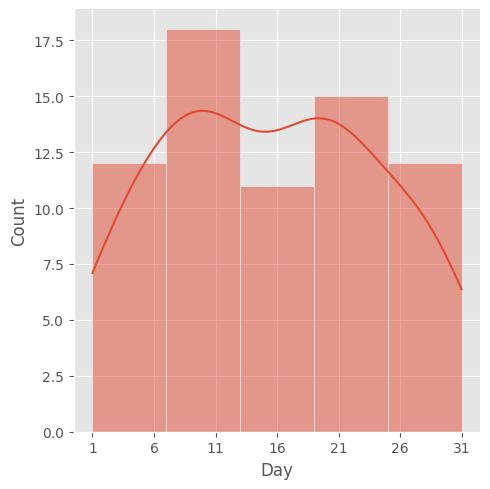

In [41]:
sns.displot(data=df_high, x="Day", kde = True, bins = 5)
plt.xticks(range(1,32,5));

In [42]:
df_usa = tesla[tesla["Country"] == "USA"]

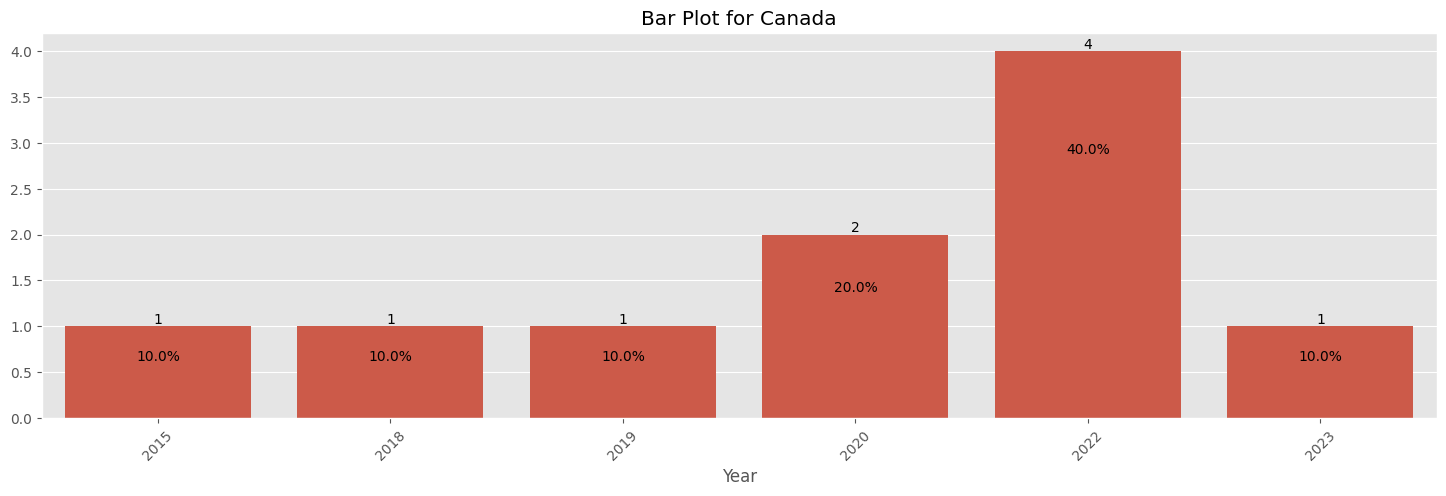

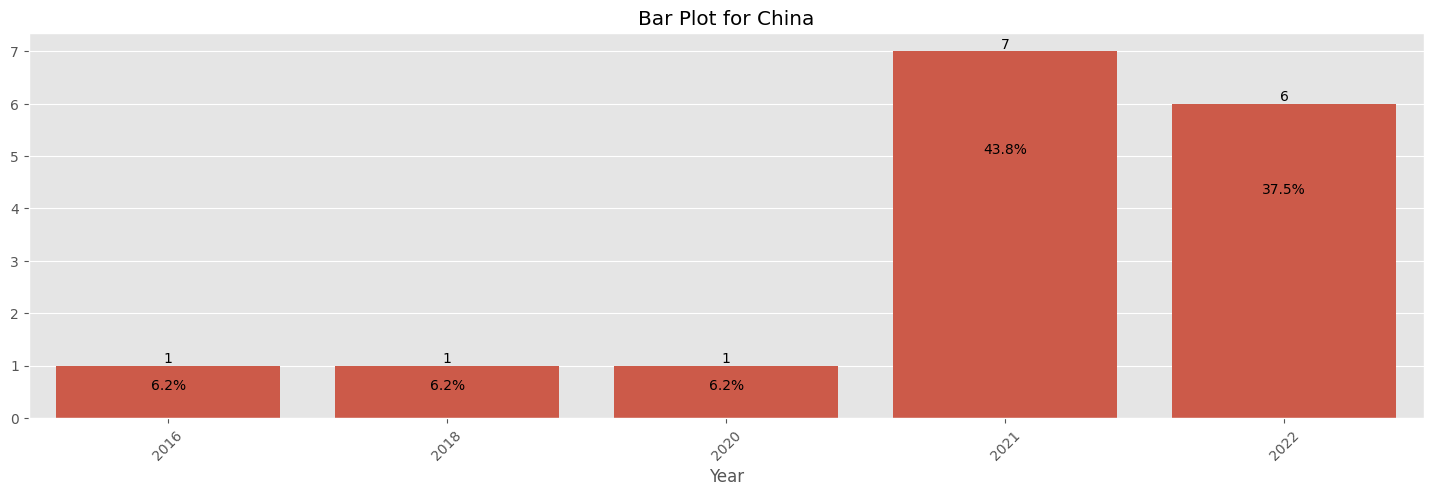

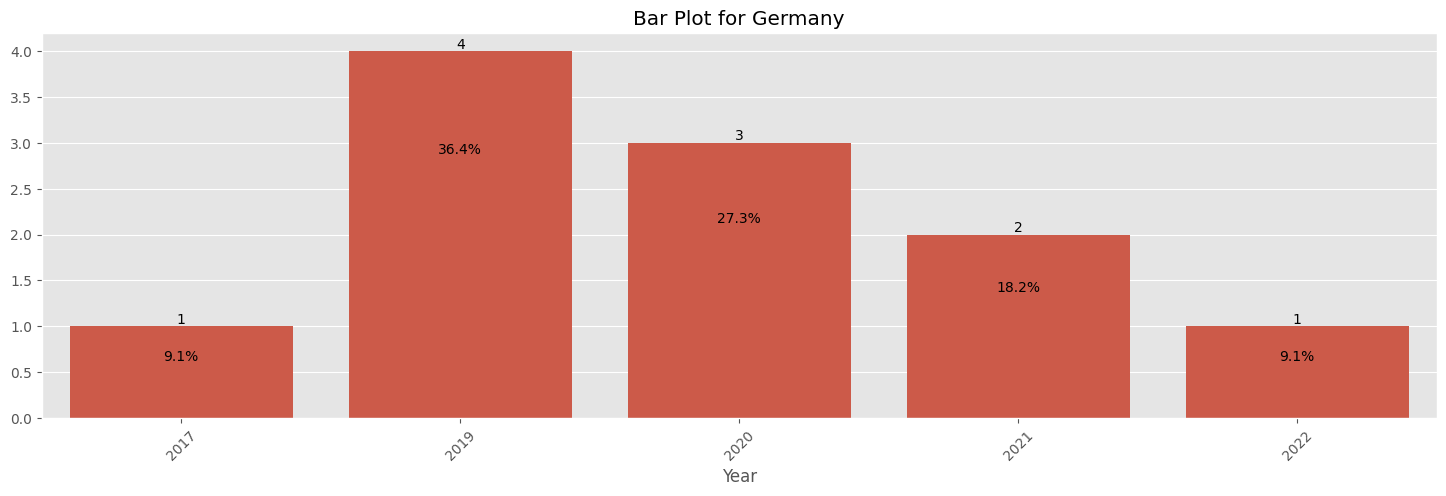

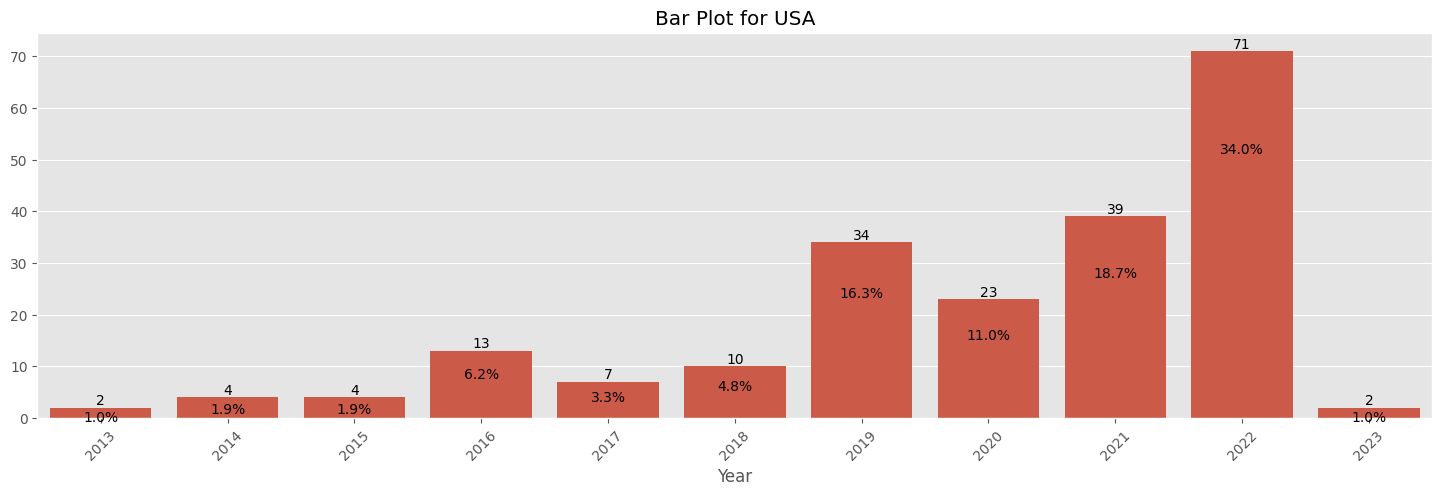

In [43]:
top_countries_list = ["USA", "China", "Germany", "Canada"] # drawing bar plot for top 4 countries with max number of events
grouped_df = tesla.groupby('Country')
for name, group in grouped_df:
    if name in top_countries_list:
        draw_barplot(colname = "Year", dframe = group, sort_index= True, labelname= name)

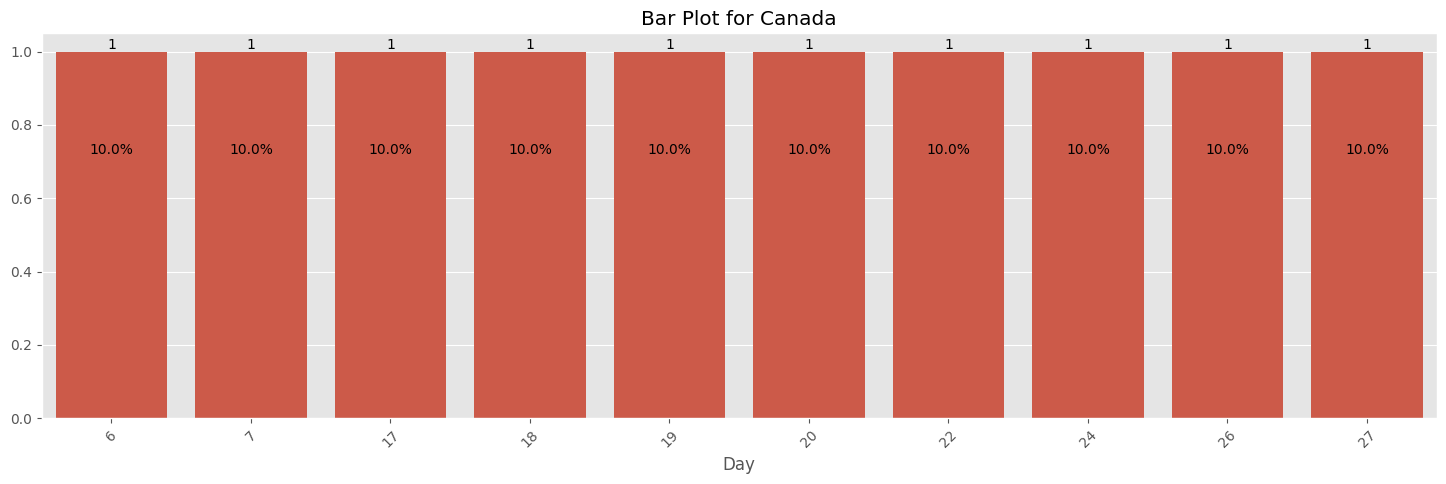

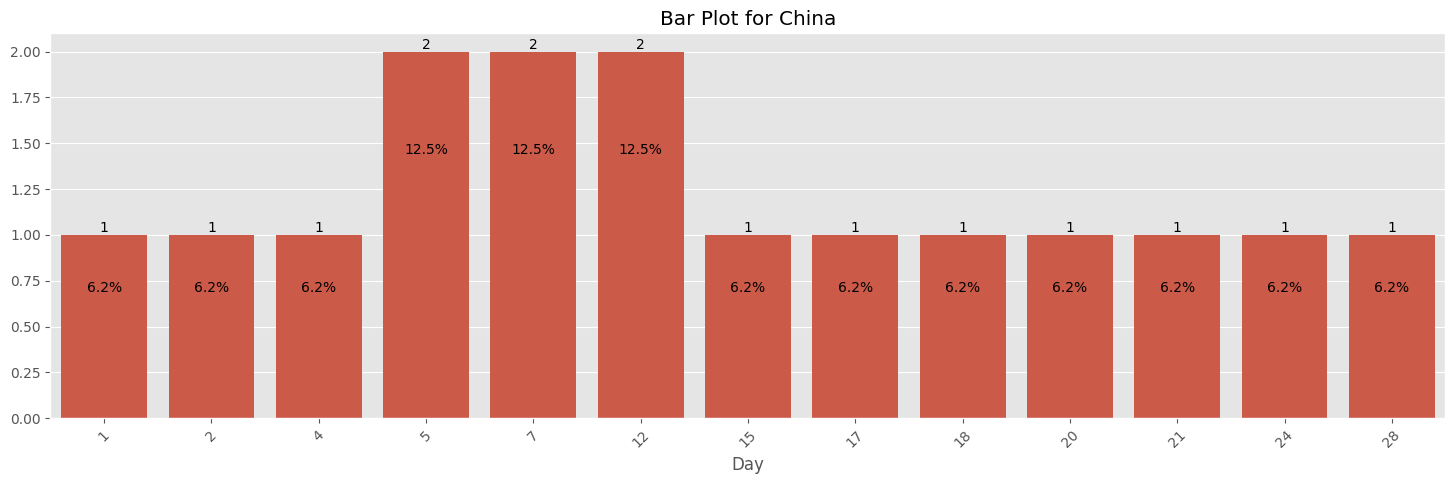

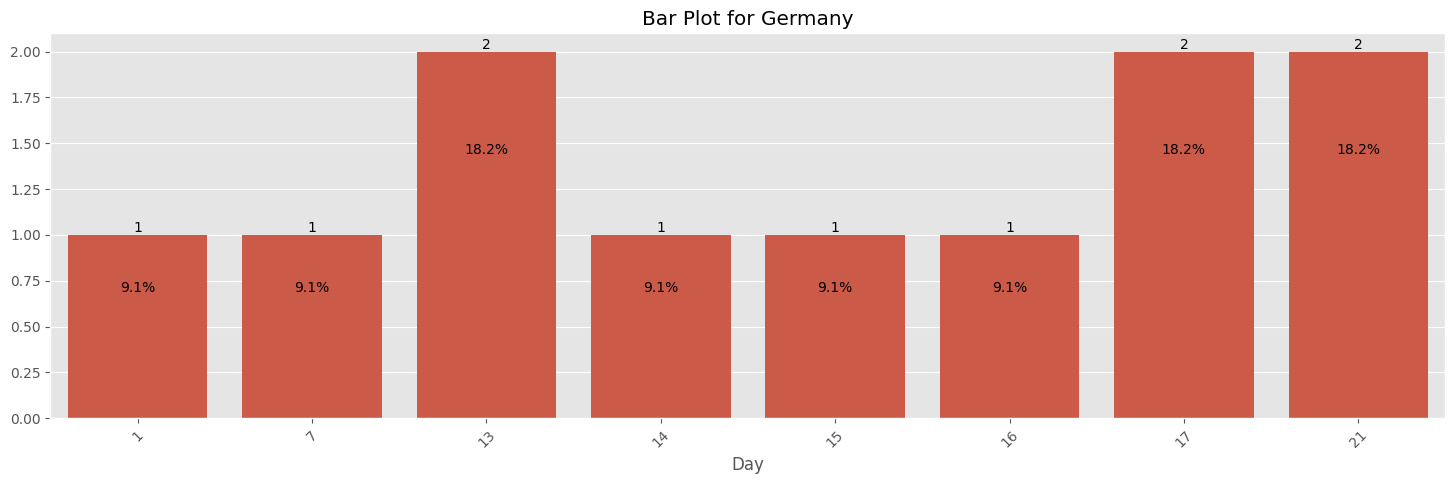

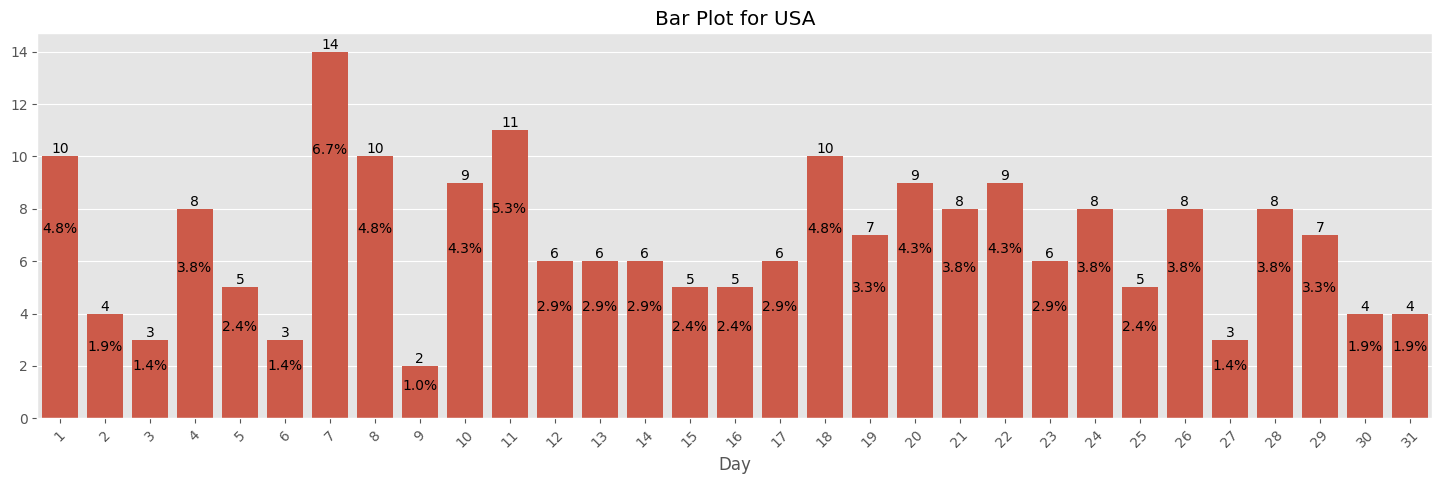

In [44]:
# drawing bar plot for top 4 countries with max number of events by days

for name, group in grouped_df:
    if name in top_countries_list:
        draw_barplot(colname = "Day", dframe = group, sort_index= True, labelname= name)

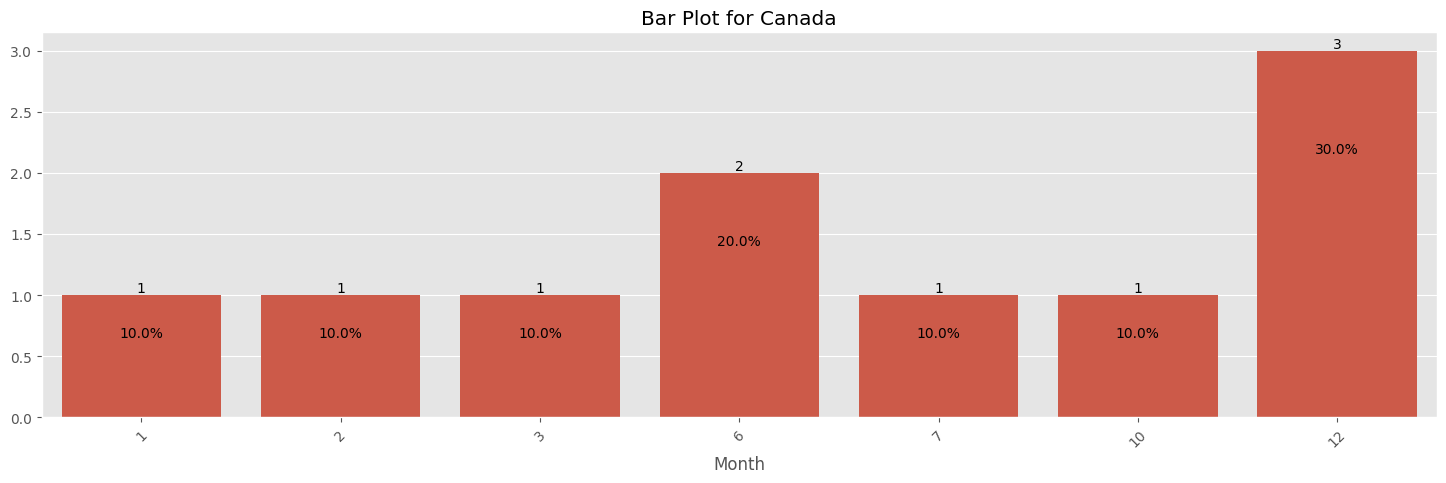

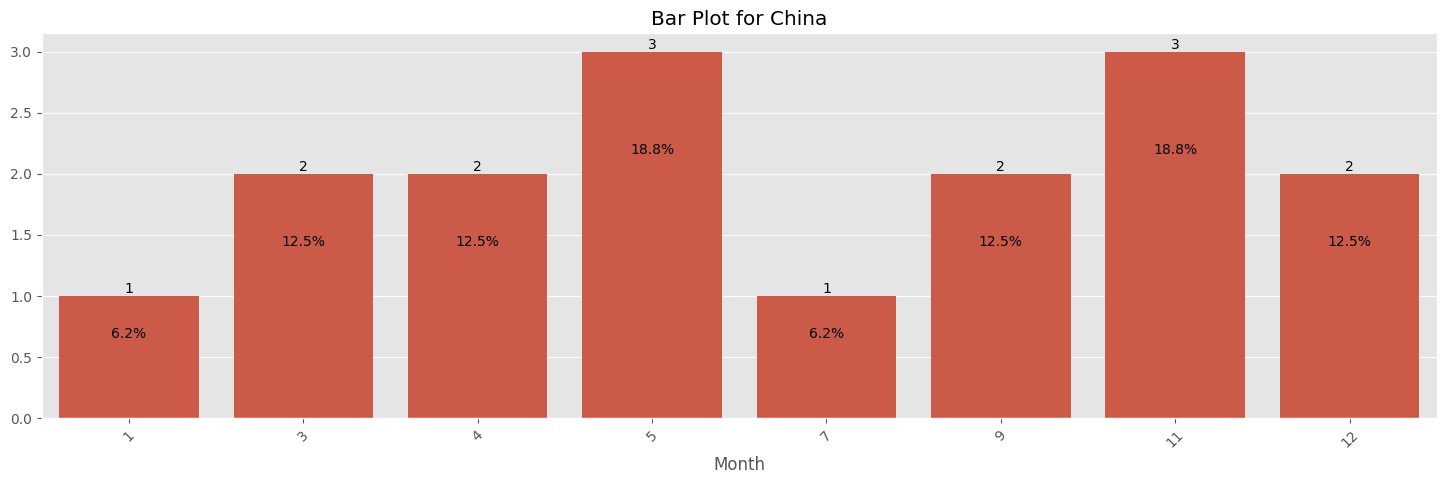

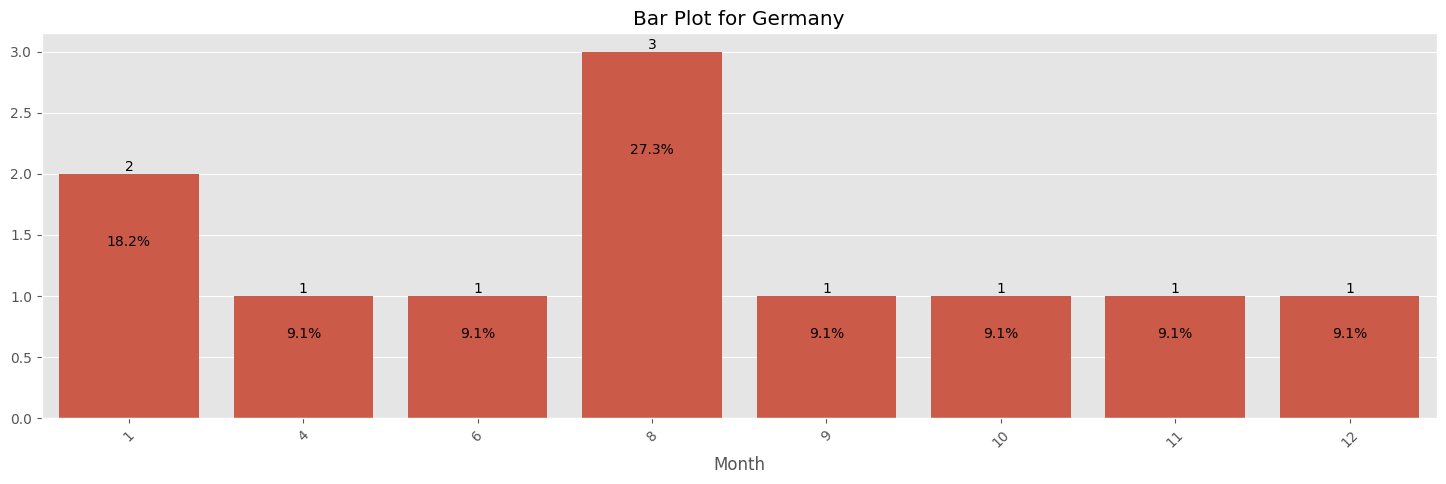

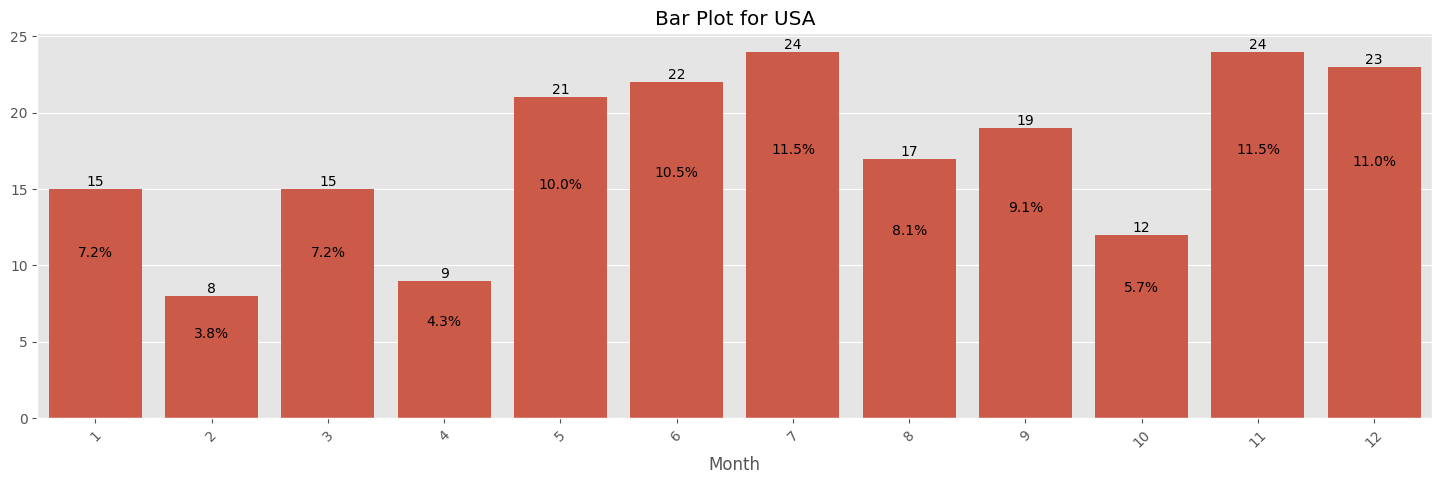

In [45]:
# drawing bar plot for top 4 countries with max number of events by months
for name, group in grouped_df:
    if name in top_countries_list:
        draw_barplot(colname = "Month", dframe = group, sort_index= True, labelname= name)

In [46]:
# drawing month wise data for other countries
df = tesla.copy()
counts = df["Country"].value_counts()
others = counts[counts < 10].index.tolist() # taking 10 as threshold
df["Country"] = df["Country"].replace(others, f'Other_{len(others)}')

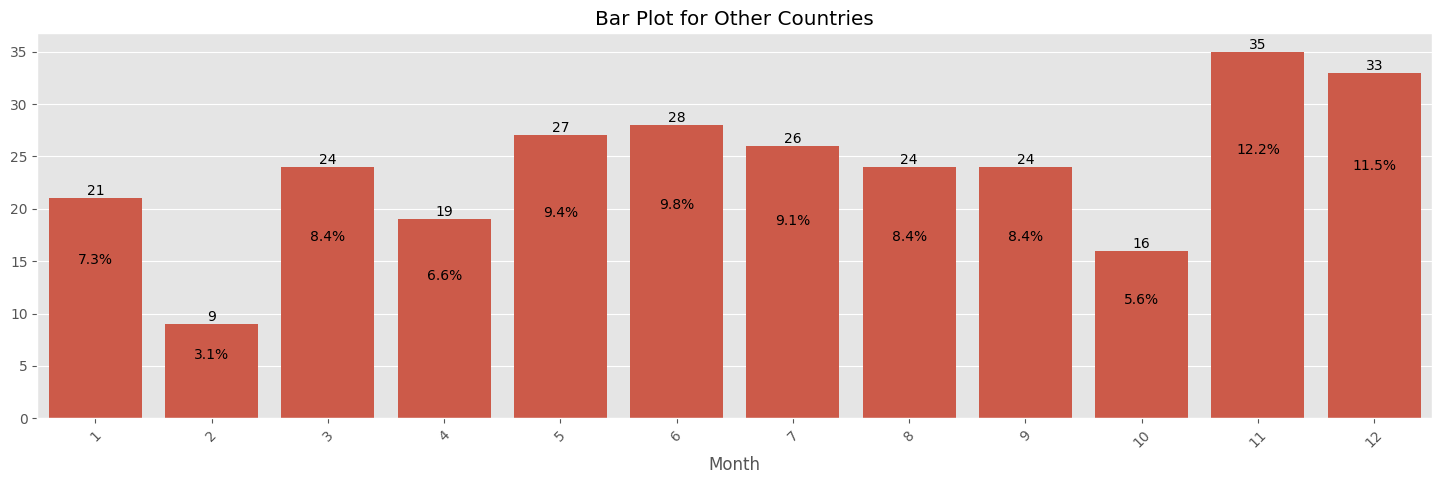

In [47]:
draw_barplot(colname = "Month", dframe = df, sort_index= True, labelname = "Other Countries")

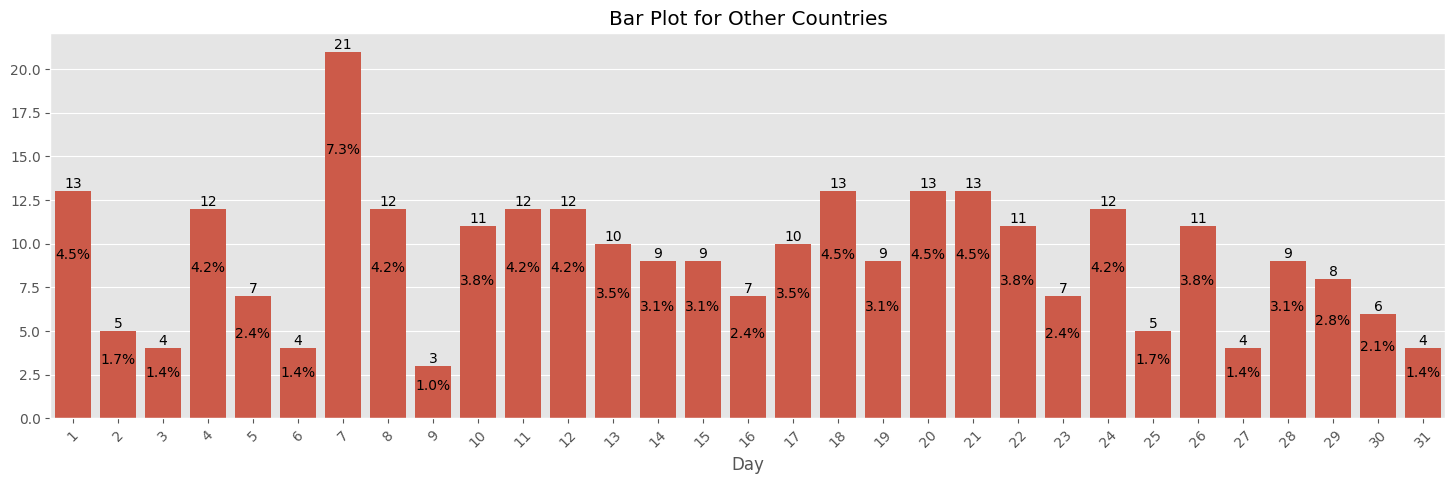

In [48]:
draw_barplot(colname = "Day", dframe = df, sort_index= True, labelname = "Other Countries")

## State-Wise EDA

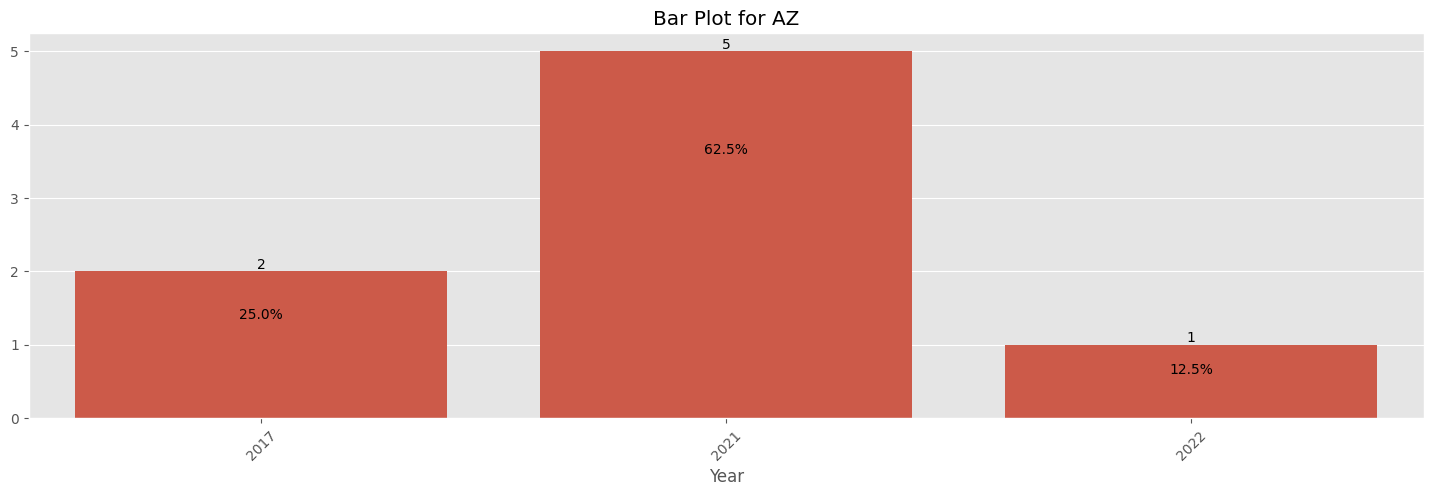

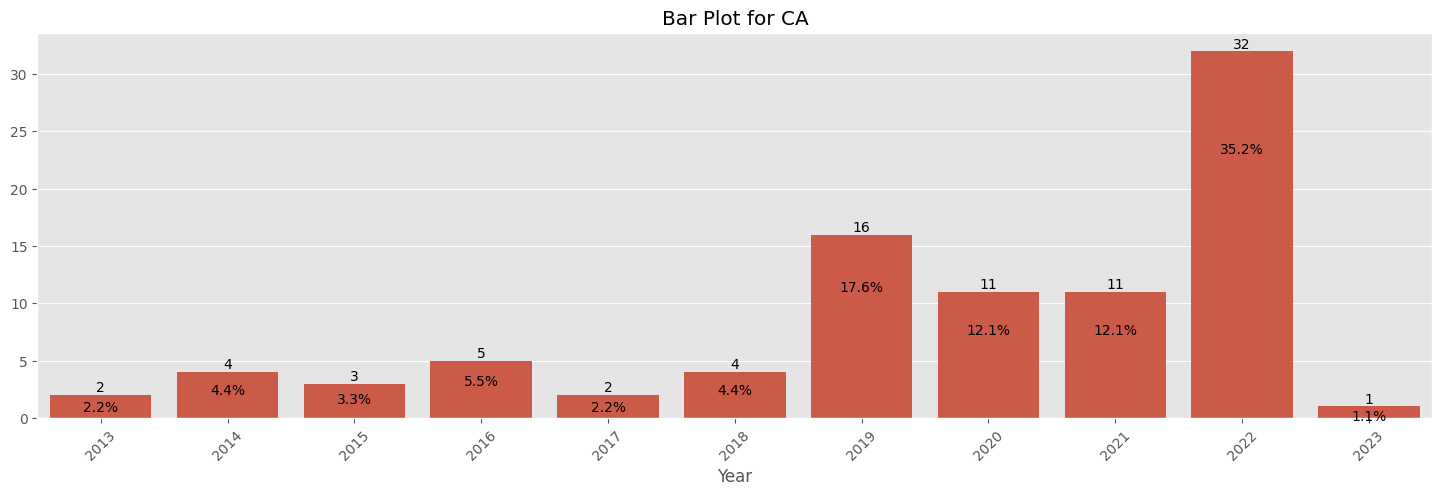

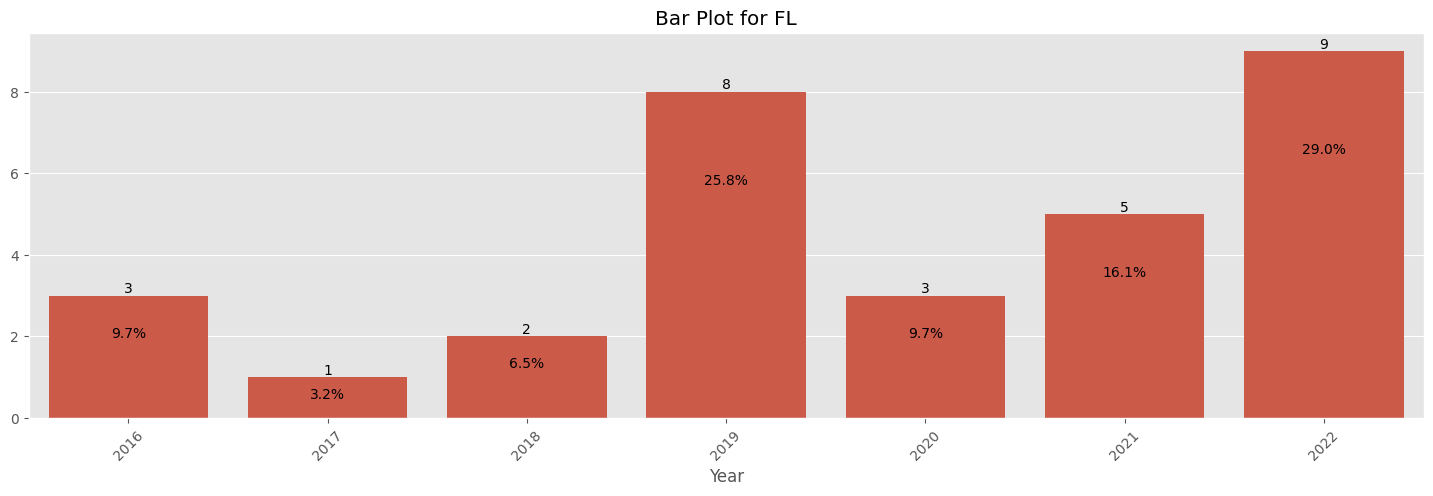

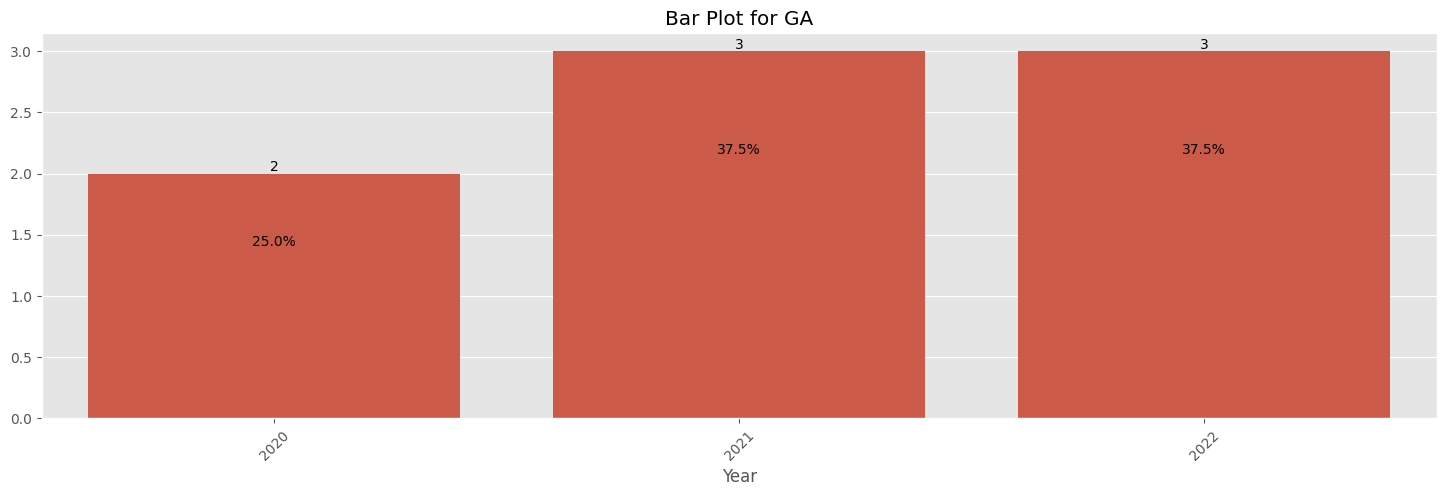

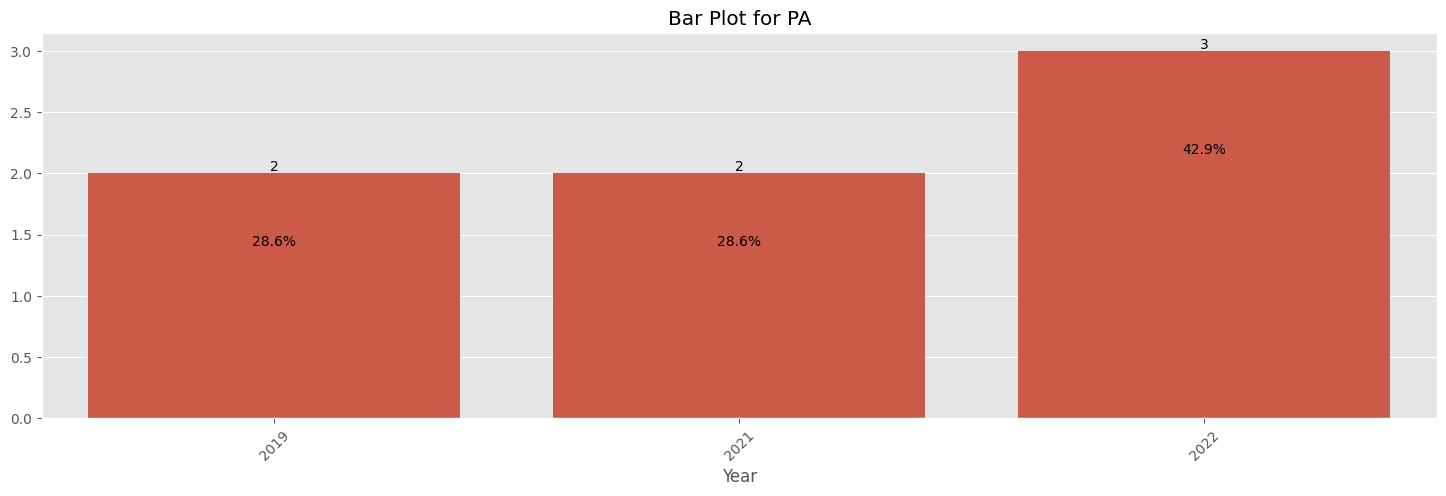

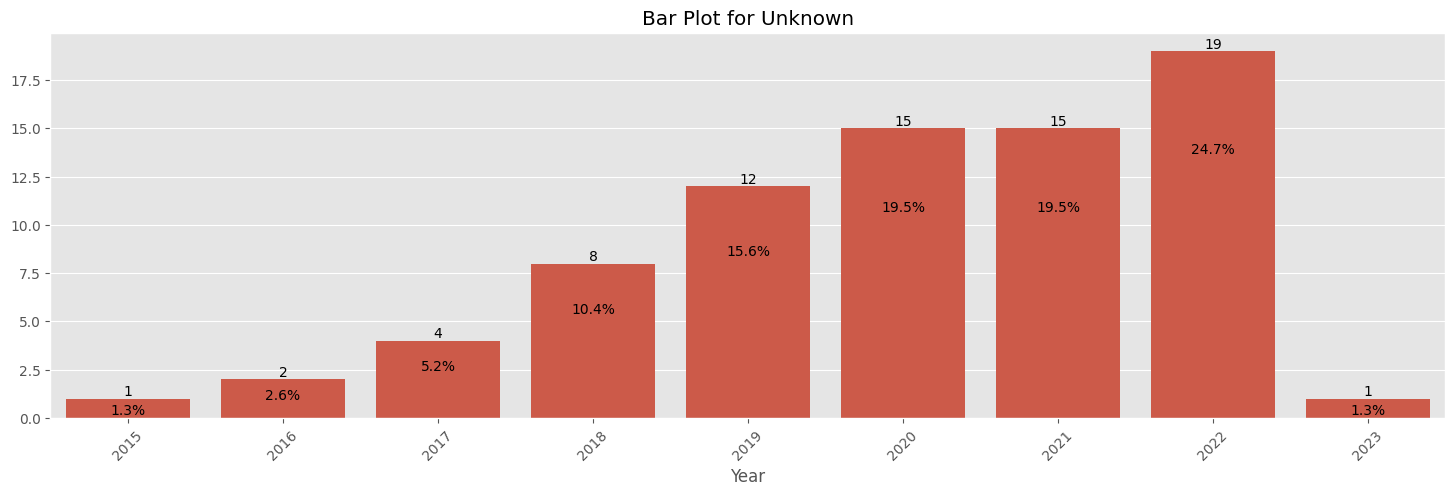

In [49]:
top_states = ["CA", "FL", "GA", "AZ", "PA", "Unknown"] #top 5 states
grouped_df = tesla.groupby('State')
for name, group in grouped_df:
    if name in top_states:
        draw_barplot(colname = "Year", dframe = group, sort_index= True, labelname= name)

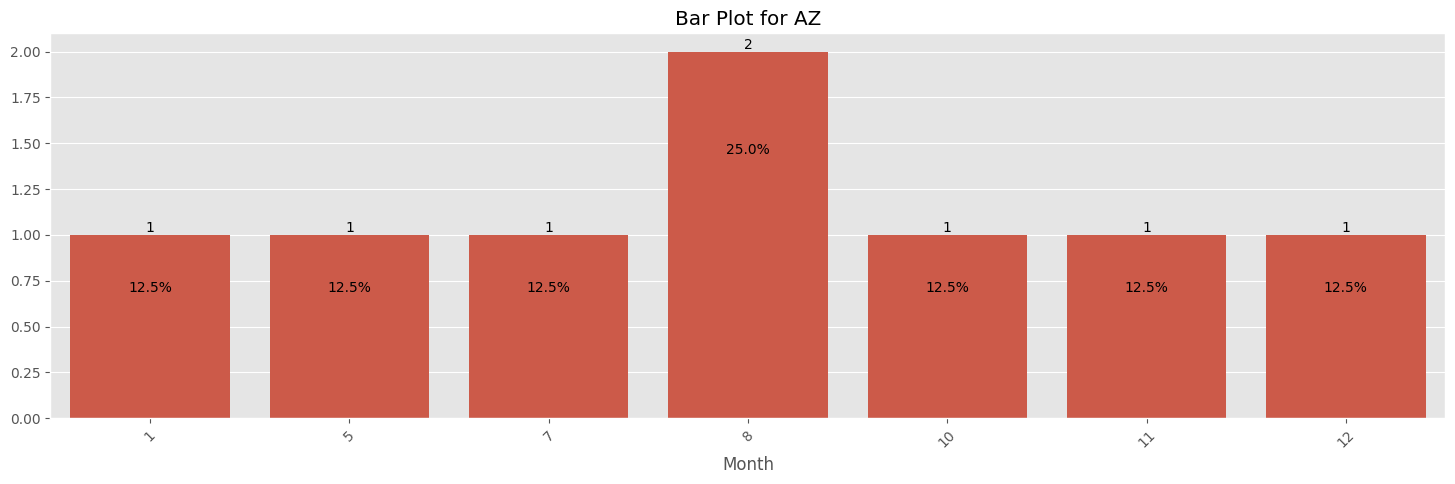

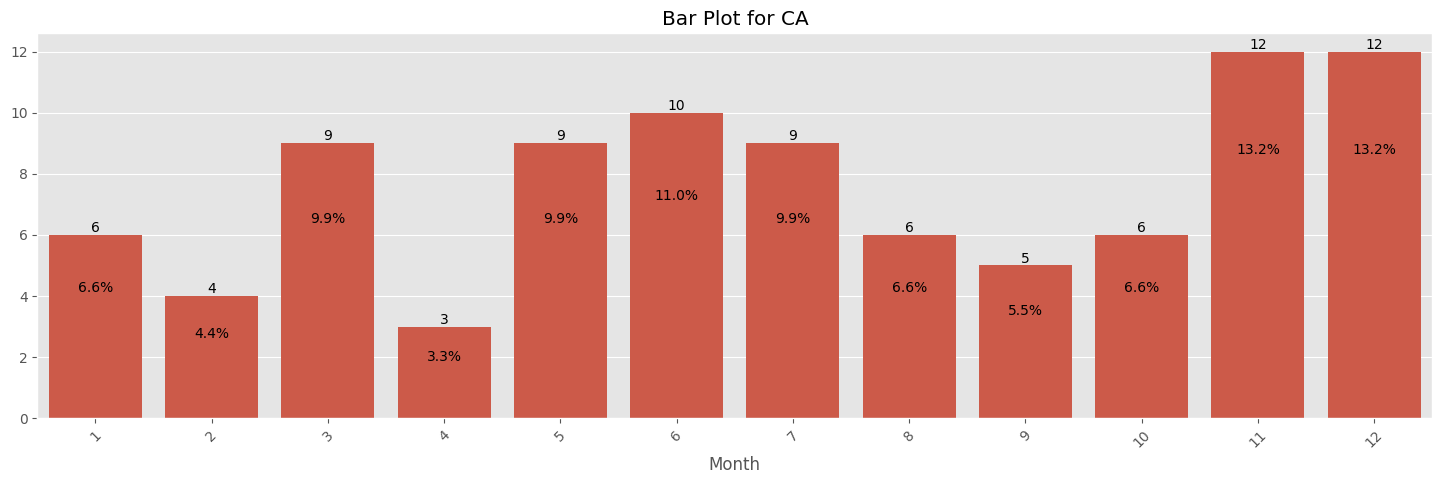

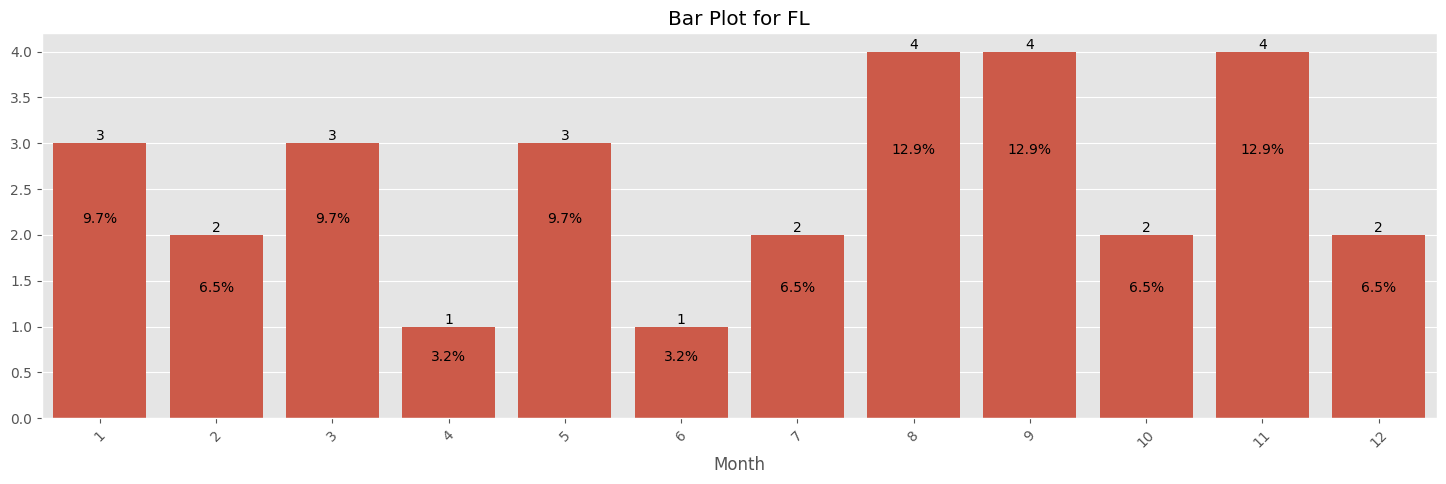

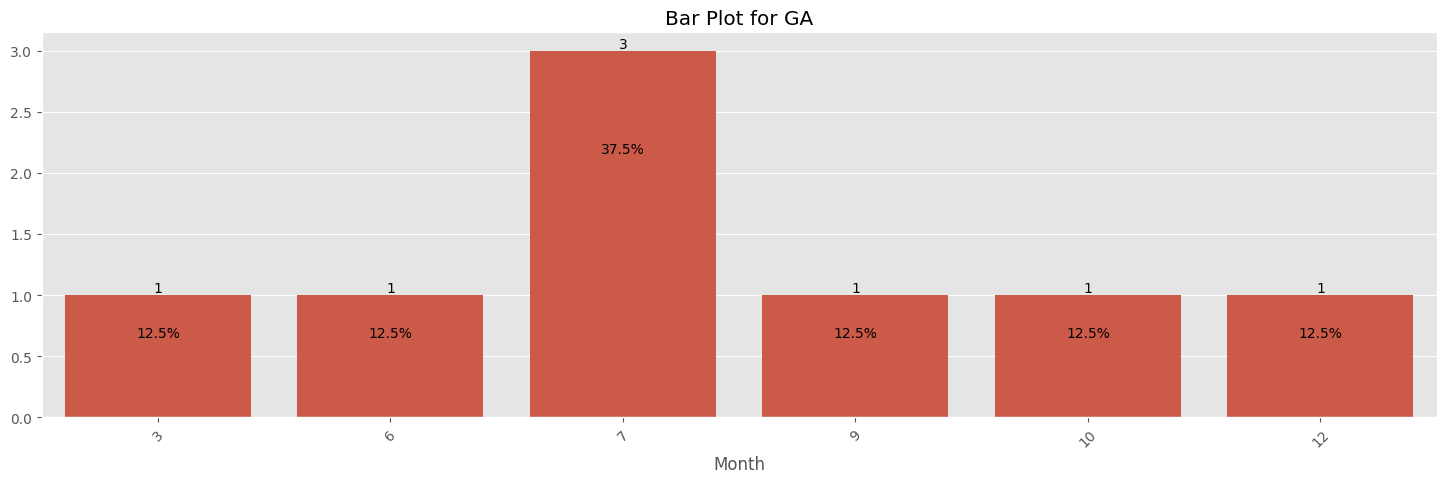

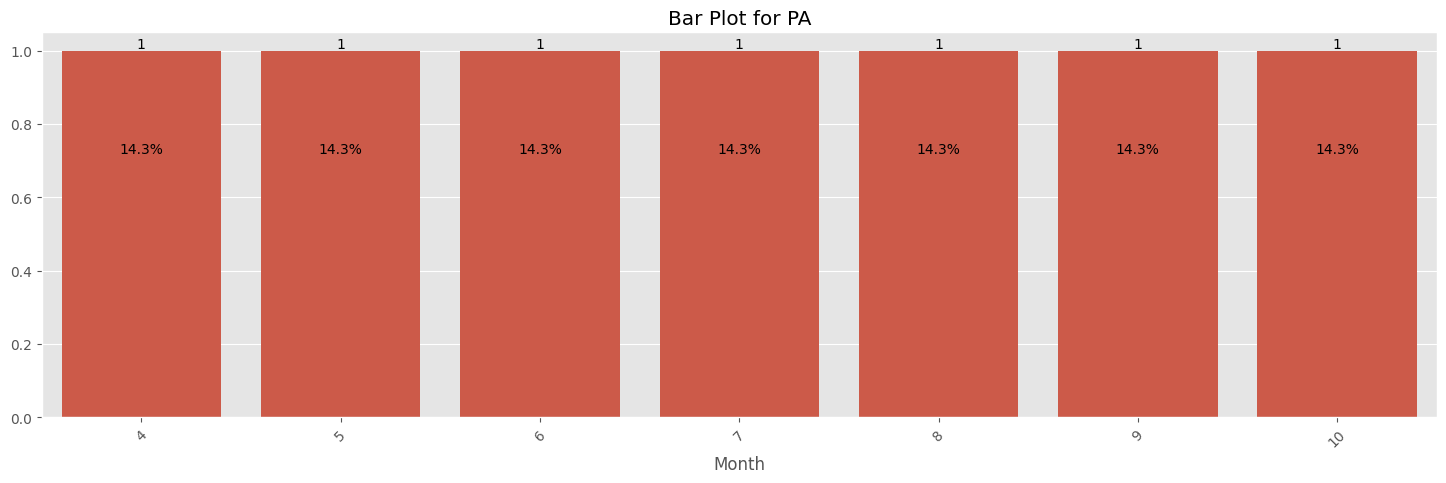

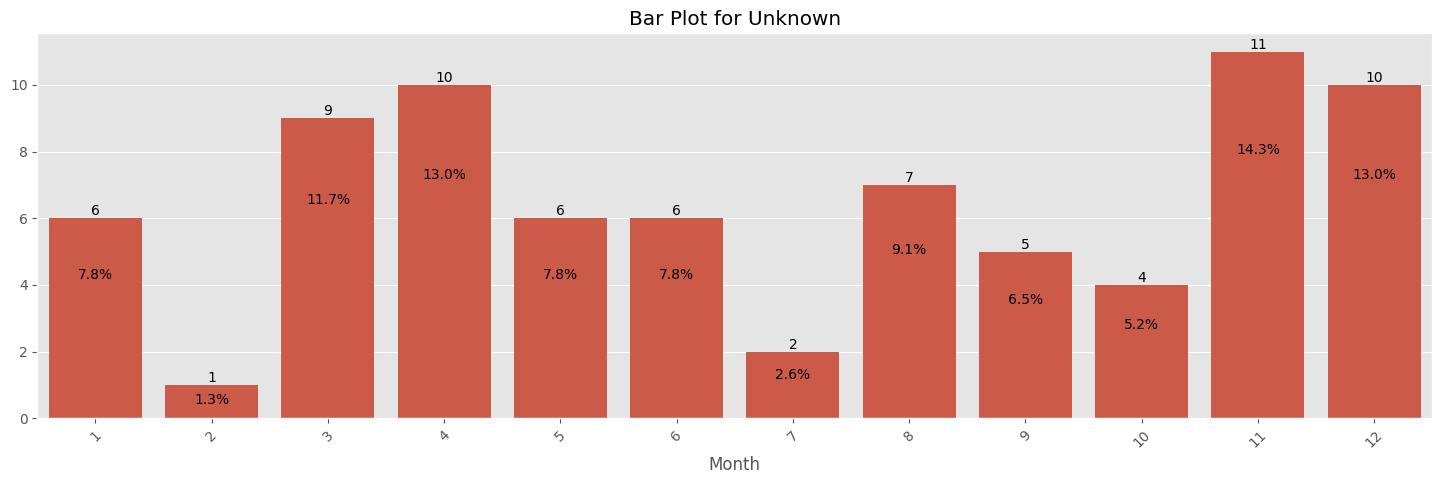

In [50]:
# drawing bar plot for top 4 countries with max number of events by months
for name, group in grouped_df:
    if name in top_states:
        draw_barplot(colname = "Month", dframe = group, sort_index= True, labelname= name)

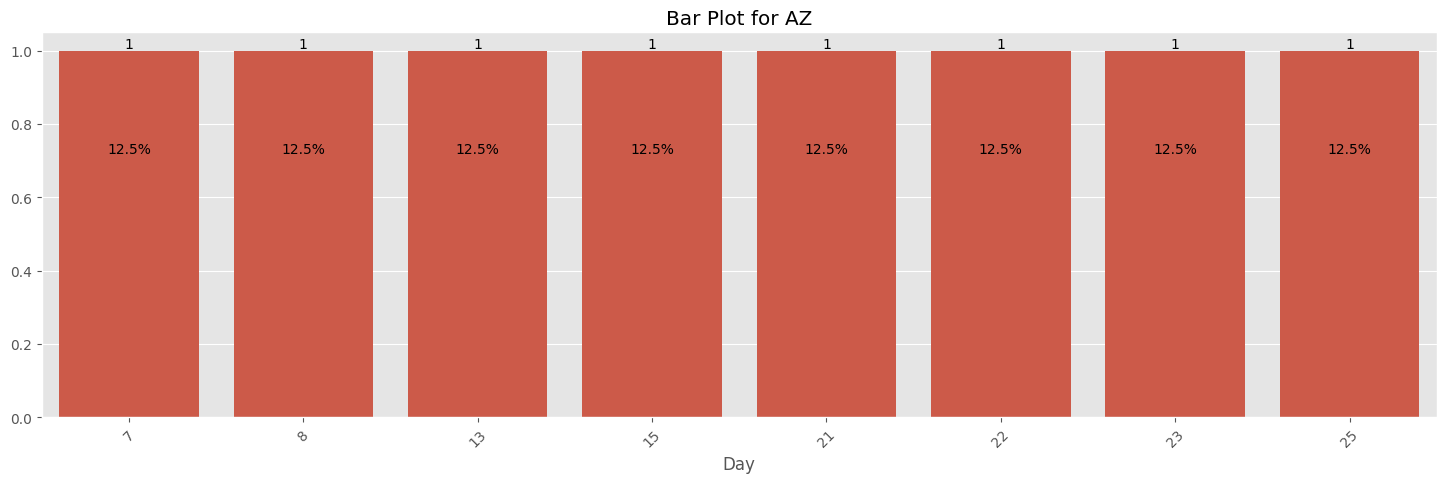

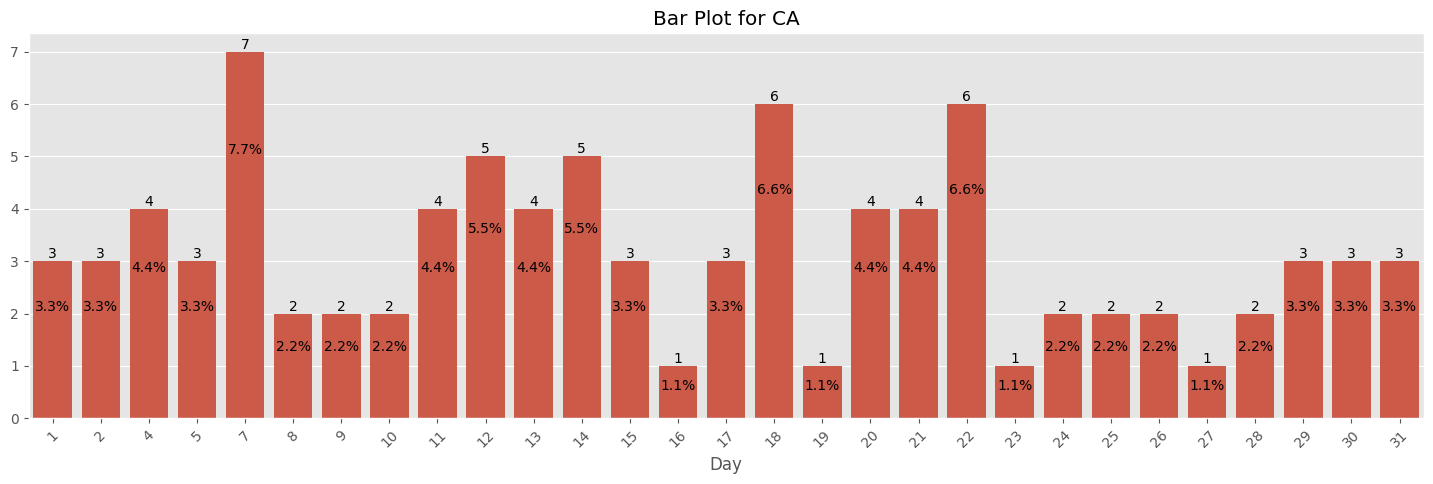

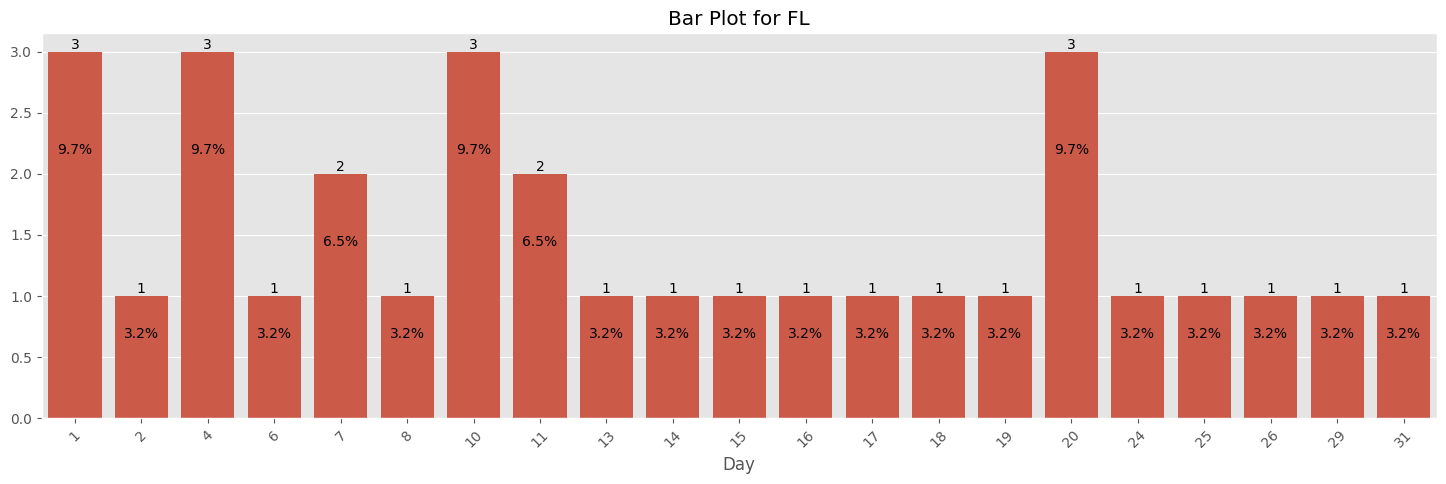

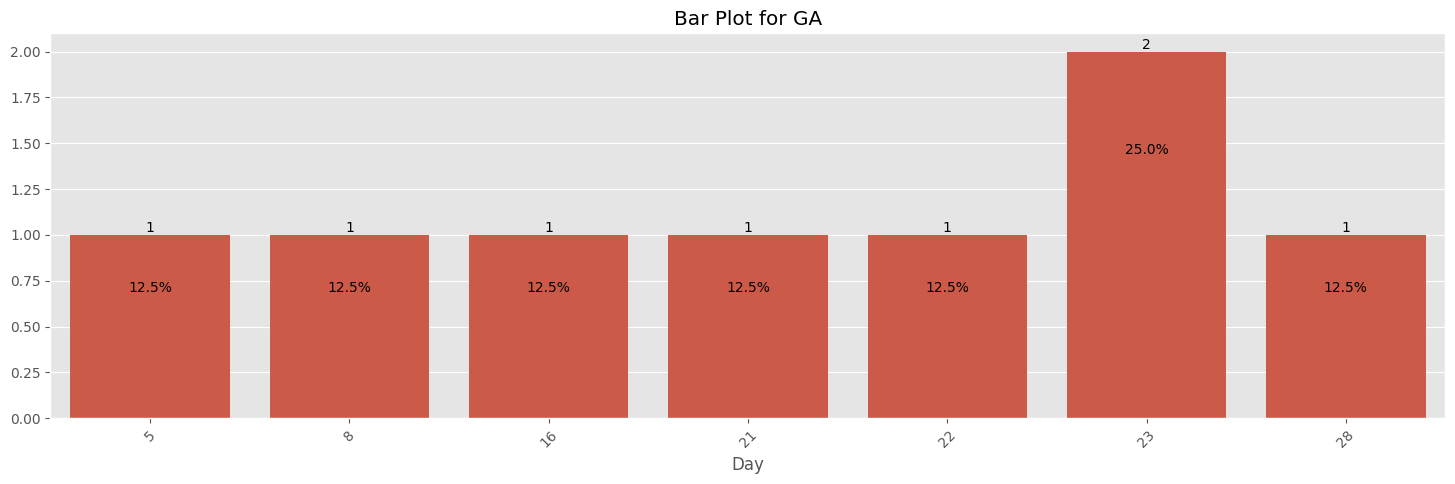

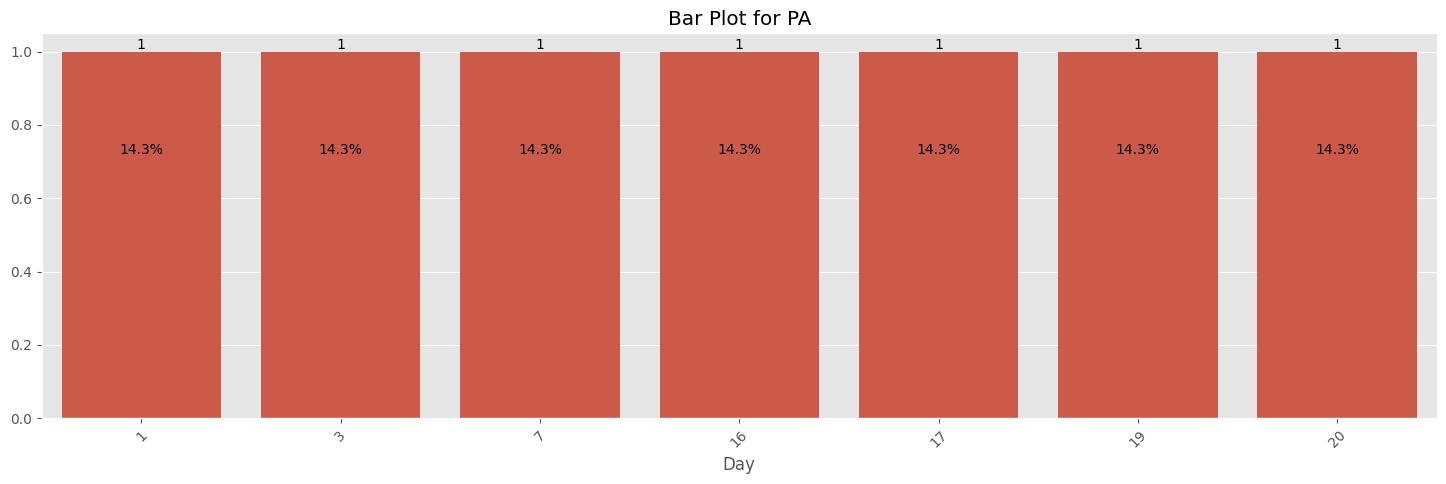

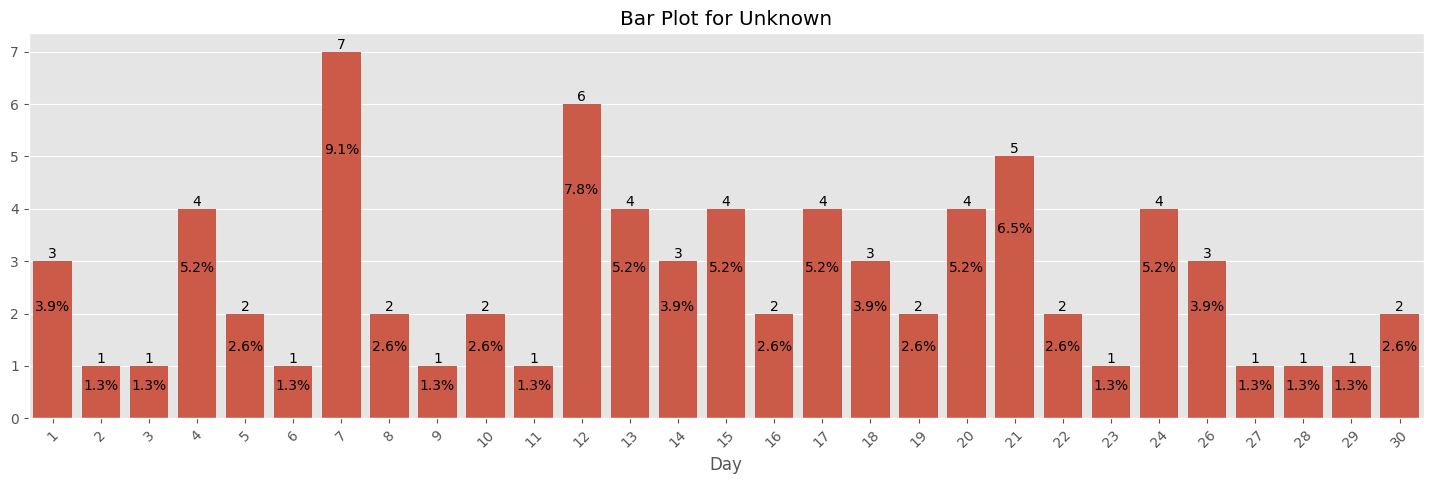

In [51]:
# drawing bar plot for top 4 countries with max number of events by months
for name, group in grouped_df:
    if name in top_states:
        draw_barplot(colname = "Day", dframe = group, sort_index= True, labelname= name)

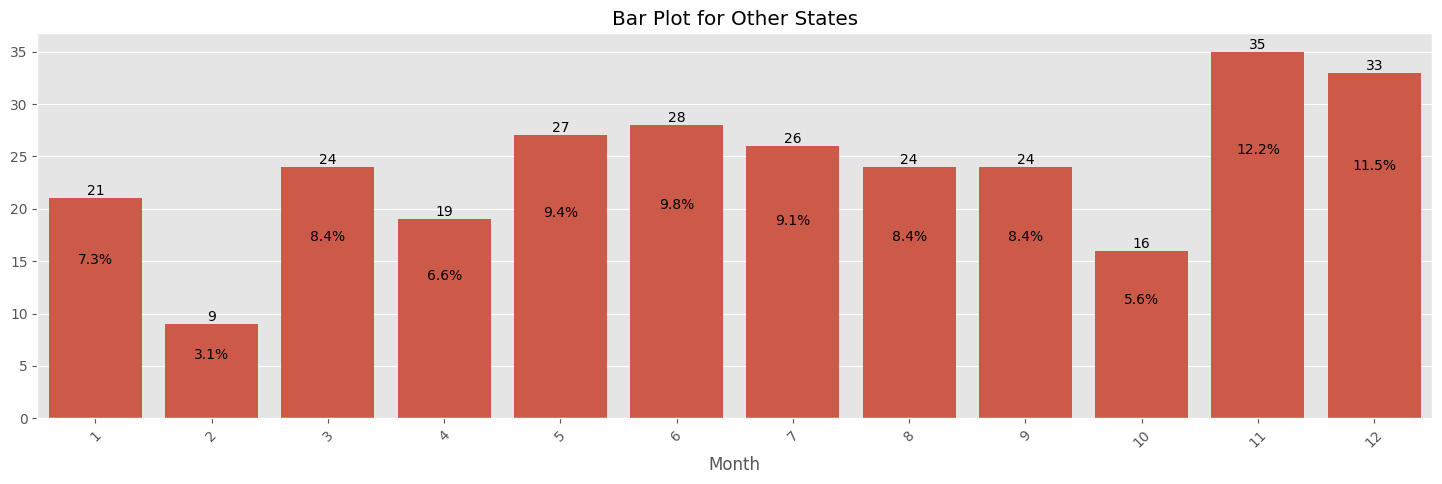

In [52]:
# drawing month wise data for other countries
df = tesla.copy()
counts = df["State"].value_counts()
others = counts[counts < 8].index.tolist() # taking 10 as threshold
df["State"] = df["State"].replace(others, f'Other_{len(others)}')
draw_barplot(colname = "Month", dframe = df, sort_index= True, labelname = "Other States")

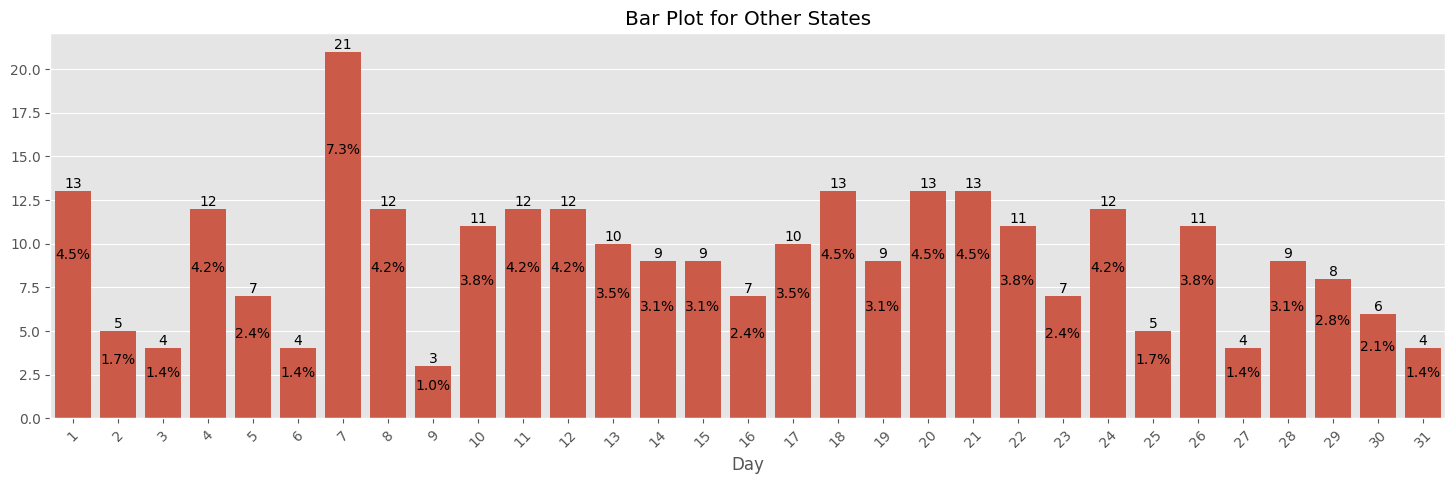

In [53]:
draw_barplot(colname = "Day", dframe = df, sort_index= True, labelname = "Other States")

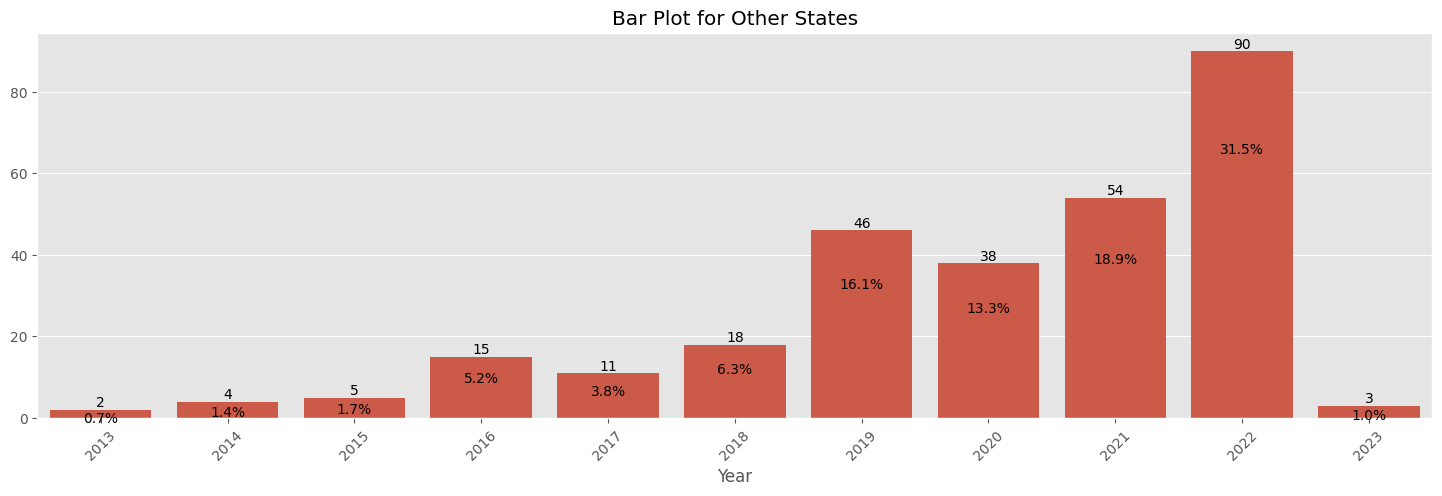

In [54]:
draw_barplot(colname = "Year", dframe = df, sort_index= True, labelname = "Other States")

### 2. Analyze the different aspects of the death events. 

a. What is the number of victims (deaths) in each accident?

In [55]:
df_test  = tesla[["Deaths", "Verified Tesla Autopilot Deaths", "Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO", "Cyclists/ Peds", "TSLA+cycl / peds"]]
df_test["Total Death"] = tesla["Verified Tesla Autopilot Deaths"] + tesla["Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO"] + tesla["Cyclists/ Peds"] + tesla["TSLA+cycl / peds"]
df_test 

,Deaths,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Cyclists/ Peds,TSLA+cycl / peds,Total Death
0,1,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,0,1,1
3,1,0,0,0,1,1
4,1,0,0,1,1,2
...,...,...,...,...,...,...
289,1,0,0,0,0,0
290,1,0,0,0,1,1
291,3,0,0,0,0,0
292,1,0,0,1,1,2


The above columns do not show consistent data (even assuming death in case of collision in worst case) as the number of deaths does not add up. Hence taking only "Deaths" column for the reporting. 

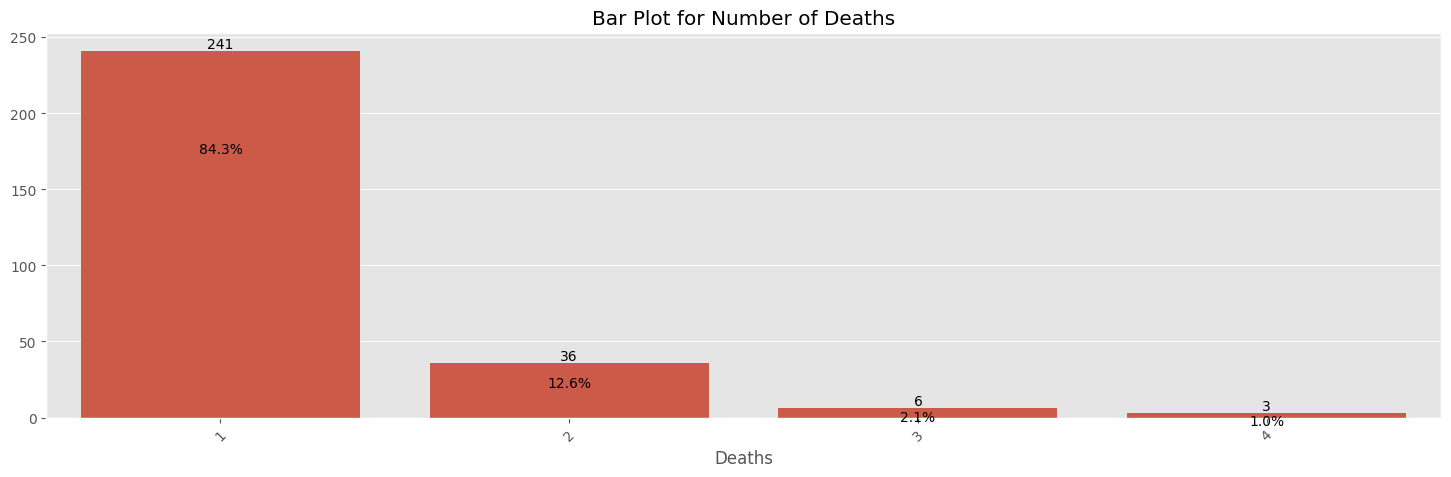

In [56]:
draw_barplot(colname= "Deaths", sort_index= True, labelname = "Number of Deaths")

In [57]:
tesla[(tesla["Deaths"] == 4)]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
20,274,2022,2022-10-18,USA,FL,"Tesla collides with minivan, engulfed by flames",4,1,1,2,0,2,Unknown,0,0,0,10,18
38,256,2022,2022-08-14,USA,CA,Tesla veers into oncoming traffic,4,1,3,0,0,4,Unknown,0,0,0,8,14
133,161,2021,2021-05-26,USA,VA,Tesla involved in multi-car highway accident,4,0,0,4,0,0,Unknown,0,0,0,5,26


Answer: In most of the cases, only one person has died (84.3% of cases), followed by 12.6% of cases with two deaths. Only 1% of the cases faced 4 deaths, where the description mentioned about colliding with minivan and collision with 2 other cars or multi-car highway accident with collision with 4 other cars.

b.  How many times did tesla drivers die?

In [59]:
tesla["Tesla driver"].value_counts()

Tesla driver
0    172
1    114
Name: count, dtype: int64

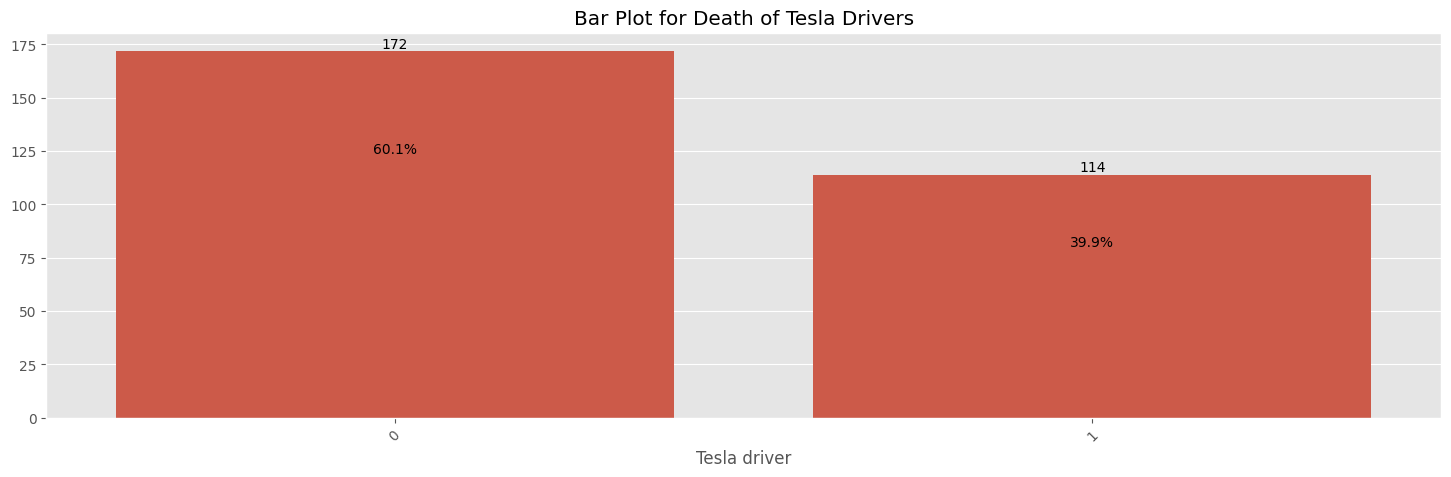

In [60]:
draw_barplot(colname = "Tesla driver", sort_index= True, labelname = "Death of Tesla Drivers")

Answer: The column contained "-" values, assuming no death, we have replaced "-" with 0 in such cases. In about 40% cases, the tesla drivers died. 

### c. What is the proportion of events in which one or more occupants died?

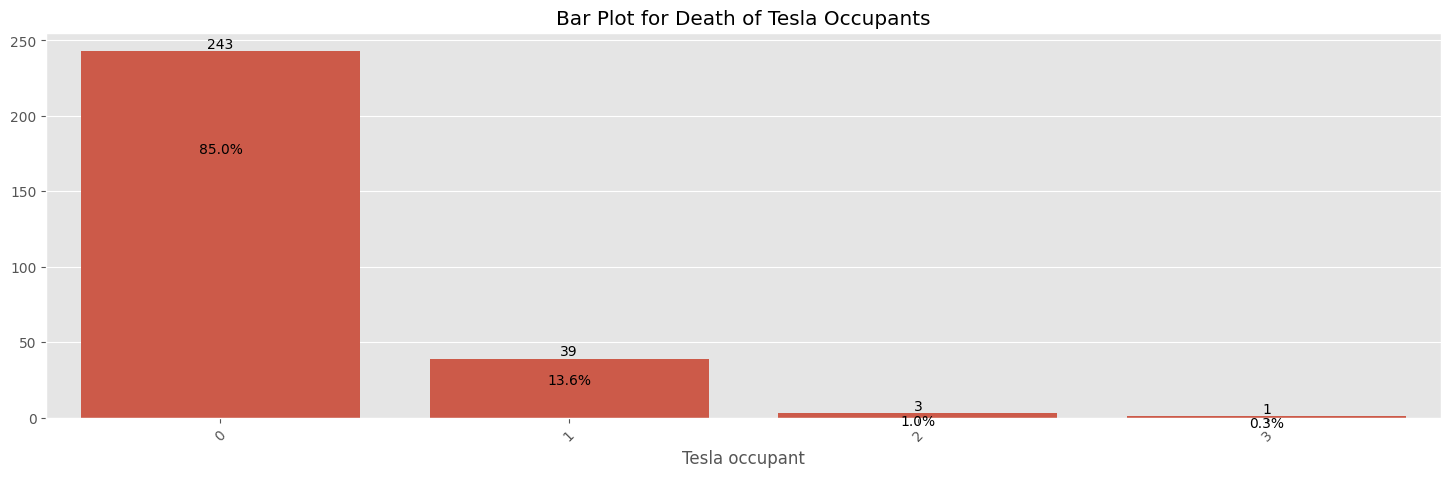

In [62]:
draw_barplot(colname = "Tesla occupant", sort_index= True, labelname = "Death of Tesla Occupants")

In [78]:
print("Number of occurrences with death of one or more occupants: ", len(tesla[tesla["Tesla occupant"] > 0]))
print("Percentage of occurrences with death of one or more occupants: ", round((len(tesla[tesla["Tesla occupant"] > 0])/len(tesla)*100),2), "%")

Number of occurrences with death of one or more occupants:  43
Percentage of occurrences with death of one or more occupants:  15.03 %


d. What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

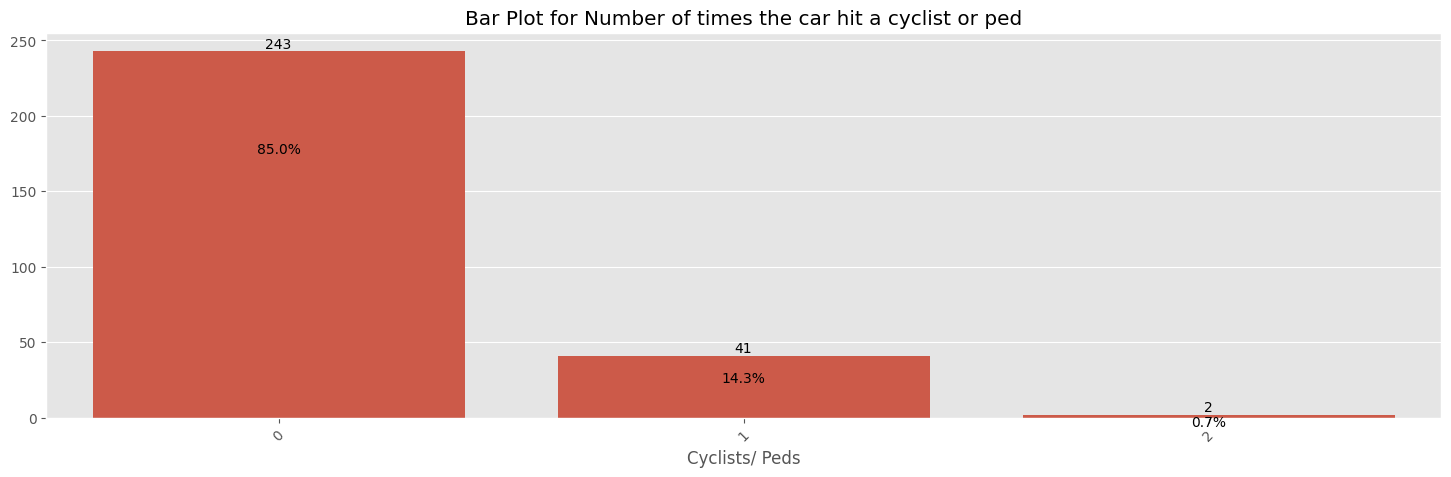

In [82]:
draw_barplot(colname = "Cyclists/ Peds", sort_index=True, labelname= "Number of times the car hit a cyclist or ped")

In [83]:
print("Number of times the car hit a cyclist or ped: ", len(tesla[tesla["Cyclists/ Peds"] > 0]))
print("Percentage of times the car hit a cyclist or ped: ", round((len(tesla[tesla["Cyclists/ Peds"] > 0])/len(tesla)*100),2), "%")

Number of times the car hit a cyclist or ped:  43
Percentage of times the car hit a cyclist or ped:  15.03 %


e. How many times did the accident involve the death of an occupant or driver of a Tesla
along with a cyclist or pedestrian?

In [96]:
df_driver_occupant_death = tesla[(tesla["Tesla occupant"] > 0 ) | (tesla["Tesla driver"] > 0)] # dataframe with driver or occupant death
print("Number of times the accident involved the death of an occupant or driver:", len(df_driver_occupant_death))
print("Number of times the accident involved the death of an occupant or driver along with colliding with the cyclist / peds:", len(df_driver_occupant_death[df_driver_occupant_death["Cyclists/ Peds"] > 0]))

Number of times the accident involved the death of an occupant or driver: 136
Number of times the accident involved the death of an occupant or driver along with colliding with the cyclist / peds: 1


f. What is the frequency of Tesla colliding with other vehicles?

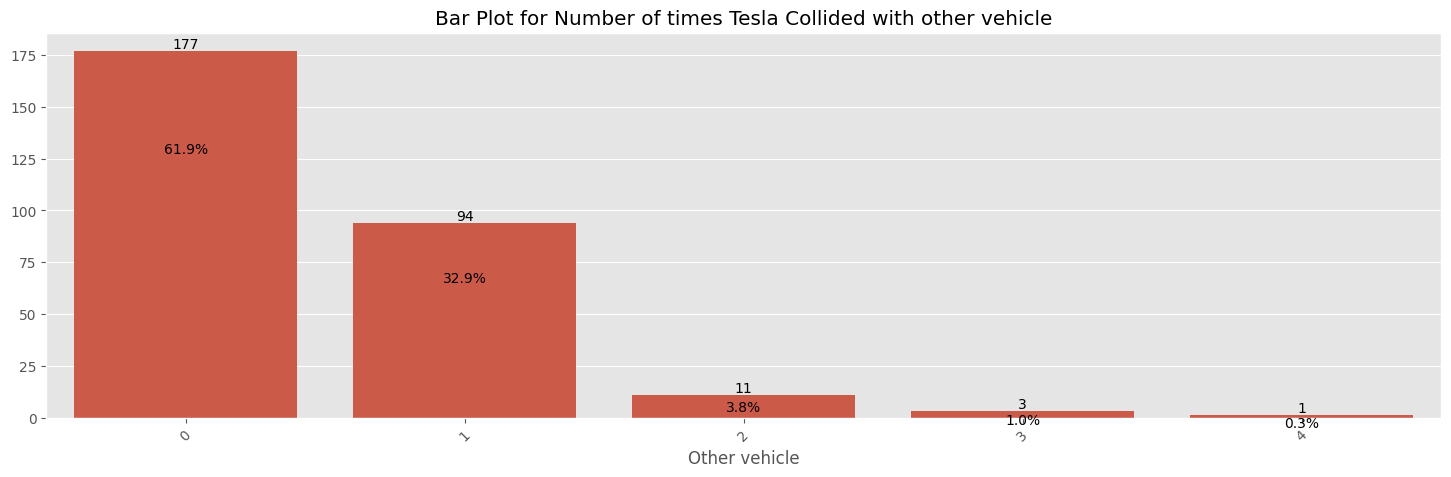

In [87]:
draw_barplot(colname = "Other vehicle", sort_index=True, labelname= "Number of times Tesla Collided with other vehicle")

In [88]:
print("Number of times the car hit a cyclist or ped: ", len(tesla[tesla["Other vehicle"] > 0]))
print("Percentage of times tesla collided with other vehicle: ", round((len(tesla[tesla["Other vehicle"] > 0])/len(tesla)*100),2), "%")

Number of times the car hit a cyclist or ped:  109
Percentage of times tesla collided with other vehicle:  38.11 %


### 3.  Study the event distribution across models

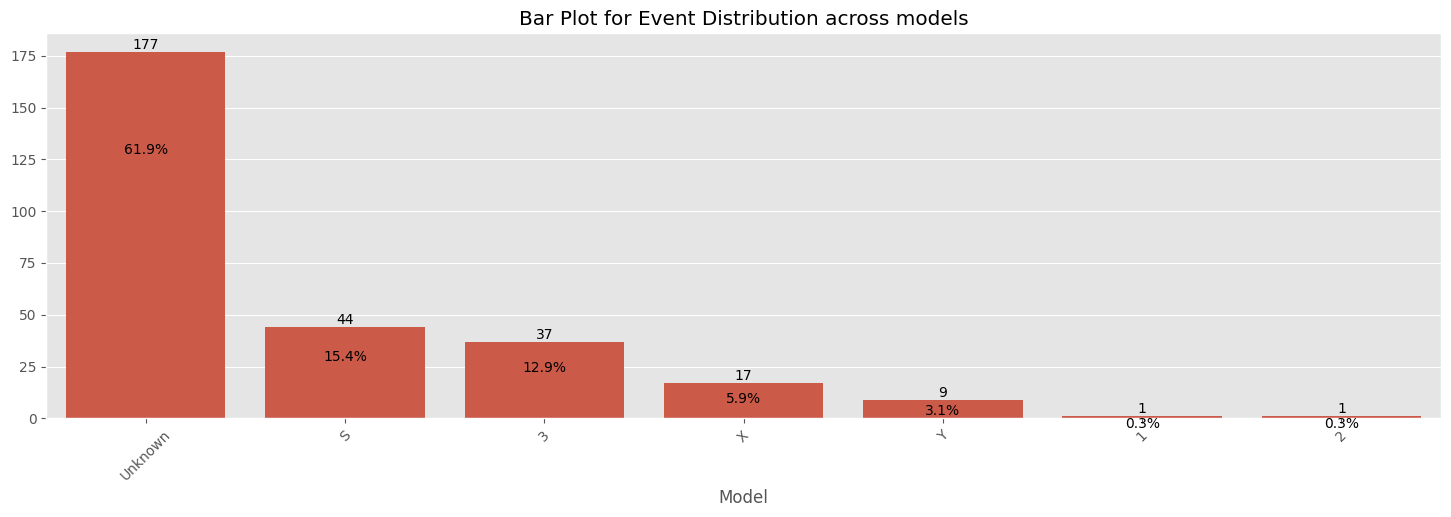

In [102]:
draw_barplot(colname="Model", labelname= "Event Distribution across models")

Around 62% of event data does not mention the model name. However, from the available data, it can be observed that the highest number of events is associated with the model S (44, 15.4%), followed by the model 3. 

### 4. Check the distribution of verified Tesla autopilot deaths

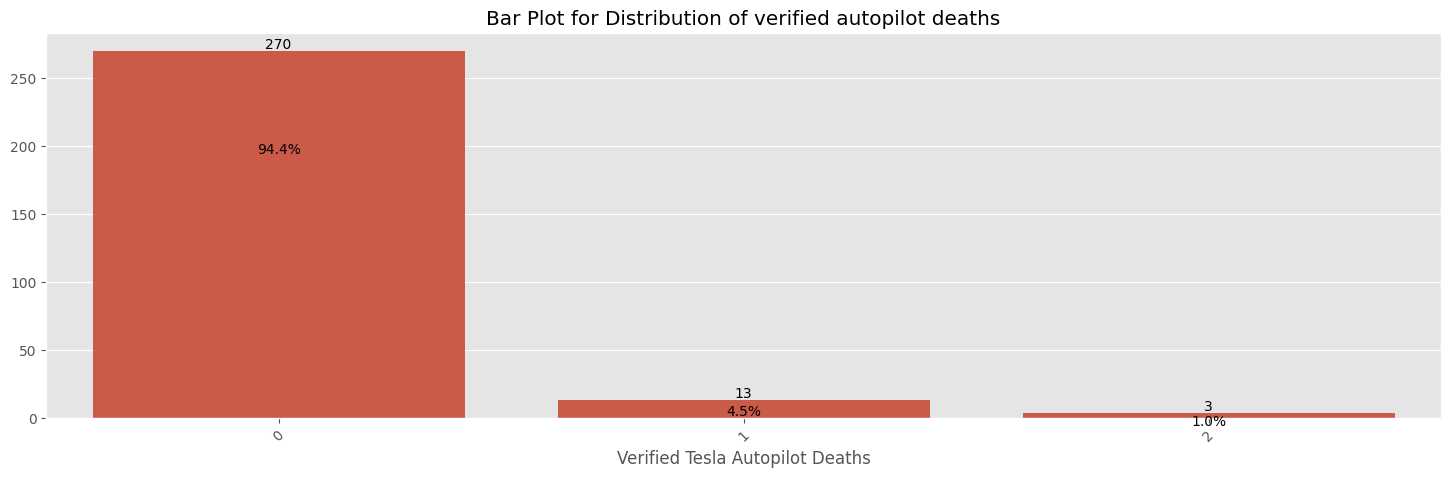

In [104]:
draw_barplot(colname = "Verified Tesla Autopilot Deaths", sort_index=True, labelname= "Distribution of verified autopilot deaths")

In [105]:
tesla[tesla["Verified Tesla Autopilot Deaths"] == 2]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Month,Day
33,261,2022,2022-08-23,USA,SC,Multi-car accident on highway,2,0,0,2,0,0,3,0,2,2,8,23
49,245,2022,2022-07-06,USA,FL,Tesla hits parked tractor-trailer,2,1,1,0,0,2,Unknown,2,2,2,7,6
194,100,2019,2019-12-29,USA,CA,Tesla runs red light after exiting freeway,2,0,0,2,0,0,S,2,2,2,12,29


The column contained a lot of "-" values, which are replaced with 0, assuming no autopilot deaths in such events. Amount of remaining data is very less to perform the data analysis. However, it can be seen that only 5.5% cases experienced autopilot deaths.